<a href="https://colab.research.google.com/github/hahoyeah/PPOA_-Competition/blob/main/PPoA_pro_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 모든 NAN값은 삭제또는 0으로 처리하자!

train.fillna(0)으로 수정하자. 삭제가 나은가..

train.dropna(axis=0) - 삭제하려면

가중치를 적용해서...

test0과 train0 데이터사용해서 해보자

['단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드', '산지코드 ', '해당일자_전체평균가격(원)'] # test 에서 사용하지 않는 열

타겟 '해당일자_전체평균가격(원)'

In [ ]:
import sys
print(sys.version)

3.7.14 (default, Sep  8 2022, 00:06:44) 
[GCC 7.5.0]


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install pandasql

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
from glob import glob
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LSTM   # LSTM 층 
from sklearn.model_selection import train_test_split
import random
import os


# 경고 끄기
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(19970119)
random.seed(19970119)
np.random.seed(19970119)

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

import folium

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
!ls -al

/content/drive/MyDrive
total 325087
drwx------ 2 root root      4096 Jul 25 05:36  버스
drwx------ 2 root root      4096 Jul  4 05:29  영화
drwx------ 2 root root      4096 Jul 21 17:28  쇼핑
drwx------ 2 root root      4096 Aug  1 05:07  와인
drwx------ 2 root root      4096 Jul 13 05:22  따릉이
drwx------ 2 root root      4096 Jul  3 02:10  타이타닉
drwx------ 2 root root      4096 Sep  2 13:46  예측대회
drwx------ 2 root root      4096 Jul  6 06:06  구내식당
drwx------ 2 root root      4096 Jul  3 02:09  데분스터디
drwx------ 2 root root      4096 Sep  5  2019 '소프트웨어적 사고'
drwx------ 2 root root      4096 Aug  3 17:29  쇼핑몰평점
drwx------ 2 root root      4096 Aug 23 08:02  여행상품신청
drwx------ 2 root root      4096 Jun 29 05:58 '와인 (1)'
-rw------- 1 root root        68 Jul  2  2020  실습10.txt
-rw------- 1 root root     31960 May 18  2021 '1_4단질병성별연령10세구간별현황(진료년월).csv'
-rw------- 1 root root     31168 Jul  2  2020 '

In [ ]:
tr_path = './aT_data/data/train/'
ts_path = './aT_data/data/test/'

In [ ]:
train=pd.read_csv(tr_path + 'train_0.csv')
test1 = pd.read_csv(ts_path+'set_0/test_0.csv')
# test2 = pd.read_csv(ts_path + 'set_1/test_0.csv')
# test3 = pd.read_csv(ts_path + 'set_2/test_0.csv')
# test4 = pd.read_csv(ts_path + 'set_3/test_0.csv')
# test5 = pd.read_csv(ts_path + 'set_4/test_0.csv')
# test6 = pd.read_csv(ts_path + 'set_5/test_0.csv')
# test7 = pd.read_csv(ts_path + 'set_6/test_0.csv')
# test8 = pd.read_csv(ts_path + 'set_7/test_0.csv')
# test9 = pd.read_csv(ts_path + 'set_8/test_0.csv')
# test10 = pd.read_csv(ts_path + 'set_9/test_0.csv')

submission = pd.read_csv('./aT_data/answer_example.csv') #이건 우선 0에 해당하는 칼럼 하나만 뽑아서 다른이름으로 저장하자

In [ ]:
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,1,0,0,0,0,0,0,0,0
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,1,0,0,0,0,0,0,0,0
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,1,0,0,0,0,0,0,0,0
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,1,0,0,0,0,0,0,0,0,0
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,1,0,0,0,0,0,0,0,0,0
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
train.head(50)

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,20130102,6143.85,2.0,12312.30,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,1,0,0,0,0,0,0,0,0
2,20130103,1898.10,48.0,91108.80,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,1,0,0,0,0,0,0,0,0
3,20130104,8488.48,120.0,1019018.00,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,1,0,0,0,0,0,0,0,0
4,20130105,3556.44,540.0,1921077.00,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,1,0,0,0,0,0,0,0,0
5,20130106,1878.12,40.0,75075.00,2.0,230001.0,23000104.0,800.0,4669.031061,396.0,...,0,1,0,0,0,0,0,0,0,0
6,20130107,8208.20,10.0,81918.00,1.0,230003.0,23000302.0,343.0,5549.780093,324.0,...,0,1,0,0,0,0,0,0,0,0
7,20130108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
8,20130109,1818.18,44.0,80380.30,1.0,230001.0,23000101.0,800.0,3552.584515,649.0,...,0,1,0,0,0,0,0,0,0,0
9,20130110,3413.41,20.0,68181.75,1.0,310401.0,31040101.0,901.0,7207.496469,354.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
train.head(50)

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,20130102,6143.85,2.0,12312.30,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,1,0,0,0,0,0,0,0,0
2,20130103,1898.10,48.0,91108.80,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,1,0,0,0,0,0,0,0,0
3,20130104,8488.48,120.0,1019018.00,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,1,0,0,0,0,0,0,0,0
4,20130105,3556.44,540.0,1921077.00,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,1,0,0,0,0,0,0,0,0
5,20130106,1878.12,40.0,75075.00,2.0,230001.0,23000104.0,800.0,4669.031061,396.0,...,0,1,0,0,0,0,0,0,0,0
6,20130107,8208.20,10.0,81918.00,1.0,230003.0,23000302.0,343.0,5549.780093,324.0,...,0,1,0,0,0,0,0,0,0,0
7,20130108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
8,20130109,1818.18,44.0,80380.30,1.0,230001.0,23000101.0,800.0,3552.584515,649.0,...,0,1,0,0,0,0,0,0,0,0
9,20130110,3413.41,20.0,68181.75,1.0,310401.0,31040101.0,901.0,7207.496469,354.0,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
train.loc[350:400]

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
350,20131217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
351,20131218,6306.30,9.0,56756.7,1.0,240004.0,24000401.0,502.0,3675.809764,1864.0,...,1,0,0,0,0,0,0,0,0,0
352,20131219,9009.00,60.0,539460.0,2.0,230003.0,23000302.0,323.0,3729.454297,633.0,...,1,0,0,0,0,0,0,0,0,0
353,20131220,1498.50,2.0,3003.0,1.0,320101.0,32010101.0,680.0,3355.724041,444.0,...,1,0,0,0,0,0,0,0,0,0
354,20131221,1881.88,56.0,104895.0,1.0,230003.0,23000303.0,800.0,3594.488108,555.0,...,1,0,0,0,0,0,0,0,0,0
355,20131222,1881.88,44.0,82417.5,1.0,230001.0,23000104.0,800.0,2796.394052,538.0,...,1,0,0,0,0,0,0,0,0,0
356,20131223,44044.00,5.0,220220.0,1.0,240001.0,24000103.0,519.0,5442.787504,270.0,...,1,0,0,0,0,0,0,0,0,0
357,20131224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
358,20131225,11011.00,10.0,109890.0,1.0,230001.0,23000104.0,800.0,8236.018519,81.0,...,1,0,0,0,0,0,0,0,0,0
359,20131226,3803.80,195.0,740259.0,3.0,371501.0,37150101.0,730.0,2997.625002,664.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
train.loc[30:60]

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
30,20130131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
31,20130201,4735.26,17.0,80580.50,2.0,230003.0,23000303.0,407.0,5475.074180,244.0,...,0,0,1,0,0,0,0,0,0,0
32,20130202,5005.00,4.0,20020.00,1.0,350301.0,35030101.0,576.0,2363.925163,459.0,...,0,0,1,0,0,0,0,0,0,0
33,20130203,6606.60,10.0,65934.00,1.0,371501.0,37150102.0,740.0,3093.017789,1529.0,...,0,0,1,0,0,0,0,0,0,0
34,20130204,1798.20,630.0,1135134.00,22.0,230001.0,23000102.0,800.0,2249.058086,1249.0,...,0,0,1,0,0,0,0,0,0,0
35,20130205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,0,0,0
36,20130206,1868.13,1140.0,2132130.00,10.0,210001.0,21000103.0,800.0,2783.155166,4646.0,...,0,0,1,0,0,0,0,0,0,0
37,20130207,4174.17,6.0,25025.00,1.0,230003.0,23000302.0,323.0,1031.969669,8399.0,...,0,0,1,0,0,0,0,0,0,0
38,20130208,4004.00,2.0,7992.00,1.0,220001.0,22000104.0,638.0,3062.845530,7279.0,...,0,0,1,0,0,0,0,0,0,0
39,20130209,2177.82,196.0,427427.00,4.0,230003.0,23000302.0,800.0,2593.412995,4327.0,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
train[710:760]

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
710,20141212,6506.50,60.0,390390.0,1.0,230003.0,23000302.0,323.0,6050.224242,363.0,...,1,0,0,0,0,0,0,0,0,0
711,20141213,600.60,20.0,12012.0,1.0,320101.0,32010101.0,680.0,5719.853133,1197.0,...,1,0,0,0,0,0,0,0,0,0
712,20141214,4035.96,40.0,161961.8,3.0,240001.0,24000102.0,520.0,4808.709365,630.0,...,1,0,0,0,0,0,0,0,0,0
713,20141215,11011.00,50.0,549450.0,1.0,230003.0,23000302.0,323.0,7622.736280,328.0,...,1,0,0,0,0,0,0,0,0,0
714,20141216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
715,20141217,3253.25,8.0,26026.0,1.0,230001.0,23000103.0,800.0,4607.781540,961.0,...,1,0,0,0,0,0,0,0,0,0
716,20141218,5285.28,20.0,105605.5,1.0,330101.0,33010101.0,138.0,5021.094858,564.0,...,1,0,0,0,0,0,0,0,0,0
717,20141219,2047.95,68.0,139260.6,1.0,230003.0,23000303.0,800.0,4035.162617,749.0,...,1,0,0,0,0,0,0,0,0,0
718,20141220,2297.70,20.0,46046.0,1.0,230001.0,23000101.0,314.0,4893.132568,958.0,...,1,0,0,0,0,0,0,0,0,0
719,20141221,7707.70,36.0,276922.8,2.0,240001.0,24000101.0,500.0,5971.215493,710.0,...,1,0,0,0,0,0,0,0,0,0


# 데이터 전처리

1월 1일과 화요일 마다 NAN값 발생
그외에 가끔 다른곳에 NAN값이 있다. 특히 2013년 1월에 많은 결측치 확인.

이때는 거래를 안하는 날인듯싶으니 결측치를 0으로 하자.

In [ ]:
test1

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,주산지_1_습도(%),주산지_2_초기온도(℃),주산지_2_최대온도(℃),주산지_2_최저온도(℃),주산지_2_평균온도(℃),주산지_2_강수량(ml),주산지_2_습도(%),일자구분_중순,일자구분_초순,월구분_1월
0,20170101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.5,-9.0,-1.0,-12.1,-6.2,0.0,83.6,0,1,1
1,20170102,6243.75,104.0,649649.7,2.0,240001.0,24000101.0,502.0,6246.631731,104.0,...,62.7,-4.7,-1.0,-10.0,-4.9,0.0,52.9,0,1,1
2,20170103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59.6,-6.4,-1.0,-11.2,-5.9,0.0,53.0,0,1,1
3,20170104,9009.00,220.0,1978020.0,1.0,230003.0,23000302.0,343.0,5120.897860,1028.0,...,62.5,-8.5,-1.0,-11.5,-6.5,0.0,64.4,0,1,1
4,20170105,10010.00,10.0,99900.0,1.0,230001.0,23000104.0,343.0,8230.493590,156.0,...,56.0,-1.5,-1.2,-9.8,-4.4,0.0,54.6,0,1,1
5,20170106,5494.50,20.0,110110.0,1.0,350301.0,35030102.0,570.0,2910.426210,847.0,...,60.6,-9.4,-1.3,-14.2,-7.5,0.0,58.0,0,1,1
6,20170107,9839.83,23.0,226226.0,2.0,371501.0,37150102.0,730.0,7929.706803,147.0,...,51.2,-8.2,-8.2,-17.1,-13.4,0.0,50.1,0,1,1
7,20170108,2472.47,332.0,820179.0,5.0,230003.0,23000303.0,800.0,2732.702081,817.0,...,50.6,-16.8,-9.3,-20.0,-14.8,0.0,49.3,0,1,1
8,20170109,10510.50,20.0,210210.0,2.0,230001.0,23000104.0,343.0,11539.305556,36.0,...,57.1,-15.5,-7.0,-20.4,-13.5,0.0,56.9,0,1,1
9,20170110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,65.8,-14.1,-2.3,-18.5,-9.8,0.0,60.3,0,1,1


In [ ]:
test2

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,주산지_2_최대온도(℃),주산지_2_최저온도(℃),주산지_2_평균온도(℃),주산지_2_강수량(ml),주산지_2_습도(%),일자구분_중순,일자구분_초순,일자구분_하순,월구분_2월,월구분_3월
0,20170226,2927.07,296.0,868868.0,6.0,230003.0,23000303.0,800.0,2902.468869,787.0,...,15.5,-1.0,9.5,0.0,39.2,0,0,1,1,0
1,20170227,3003.00,52.0,156156.0,1.0,230001.0,23000101.0,800.0,3589.084416,462.0,...,14.2,1.8,8.4,0.0,49.5,0,0,1,1,0
2,20170228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.7,1.3,7.1,0.0,52.3,0,0,1,1,0
3,20170301,1381.38,8.0,10989.0,1.0,230001.0,23000103.0,800.0,2571.482836,670.0,...,8.5,1.0,6.1,34.7,92.7,0,1,0,0,1
4,20170302,4995.00,7.0,35035.0,1.0,380401.0,38040101.0,660.0,1941.843137,102.0,...,8.0,1.0,3.6,61.5,76.1,0,1,0,0,1
5,20170303,1201.20,56.0,67067.0,2.0,320101.0,32010101.0,680.0,2911.339031,702.0,...,10.2,-3.1,3.1,0.0,71.7,0,1,0,0,1
6,20170304,5305.30,11.0,58358.3,1.0,360301.0,36030102.0,540.0,4007.300000,91.0,...,12.7,1.0,7.7,0.0,69.6,0,1,0,0,1
7,20170305,2652.65,76.0,201601.4,1.0,230001.0,23000103.0,800.0,2831.209259,864.0,...,17.1,1.0,8.5,0.0,74.2,0,1,0,0,1
8,20170306,3496.50,8.0,27972.0,1.0,230001.0,23000103.0,800.0,5055.941176,34.0,...,12.8,3.5,6.7,0.0,75.6,0,1,0,0,1
9,20170307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.1,2.1,5.7,0.0,67.7,0,1,0,0,1


In [ ]:
test3

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,주산지_2_초기온도(℃),주산지_2_최대온도(℃),주산지_2_최저온도(℃),주산지_2_평균온도(℃),주산지_2_강수량(ml),주산지_2_습도(%),일자구분_초순,일자구분_하순,월구분_4월,월구분_5월
0,20170423,11088.90,100.0,1111110.00,1.0,230001.0,23000101.0,314.0,3765.549597,744.0,...,18.3,22.6,16.0,19.3,0.0,35.1,0,1,1,0
1,20170424,9490.50,64.0,608608.00,1.0,110001.0,11000103.0,355.0,6709.439286,140.0,...,17.4,22.8,12.5,17.7,0.0,44.0,0,1,1,0
2,20170425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.5,25.1,8.8,16.9,0.0,60.6,0,1,1,0
3,20170426,2497.50,80.0,199800.00,2.0,230003.0,23000302.0,800.0,2787.192355,327.0,...,14.6,22.3,9.5,16.1,0.0,52.2,0,1,1,0
4,20170427,750.75,16.0,11988.00,1.0,320101.0,32010101.0,680.0,3098.419896,48.0,...,13.4,21.0,10.3,15.1,0.0,66.1,0,1,1,0
5,20170428,2497.50,200.0,499500.00,4.0,230003.0,23000303.0,800.0,2678.584106,752.0,...,15.5,20.3,12.2,15.5,1.0,66.8,0,1,1,0
6,20170429,3903.90,48.0,187387.20,1.0,210001.0,21000103.0,550.0,5452.509268,123.0,...,12.8,20.2,10.2,14.7,2.3,61.6,0,1,1,0
7,20170430,3966.03,40.0,158541.30,1.0,310401.0,31040105.0,138.0,2913.256260,692.0,...,10.9,15.2,8.0,10.6,20.1,86.9,0,1,1,0
8,20170501,10989.00,5.0,54945.00,1.0,230001.0,23000104.0,800.0,4077.006645,301.0,...,10.4,14.0,8.9,10.6,3.1,81.7,1,0,0,1
9,20170502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.8,18.7,7.7,12.0,1.5,72.3,1,0,0,1


In [ ]:
test10

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,주산지_2_최대온도(℃),주산지_2_최저온도(℃),주산지_2_평균온도(℃),주산지_2_강수량(ml),주산지_2_습도(%),일자구분_중순,일자구분_초순,일자구분_하순,월구분_5월,월구분_6월
0,20180520,6113.88,85.0,521020.5,3.0,220001.0,22000103.0,769.0,7090.041770,984.0,...,26.5,13.0,19.7,0.0,57.8,1,0,0,1,0
1,20180521,5744.25,28.0,160839.0,1.0,310401.0,31040105.0,323.0,6320.267127,1687.0,...,26.0,16.3,19.8,0.0,75.9,0,0,1,1,0
2,20180522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.5,14.7,20.2,0.0,74.7,0,0,1,1,0
3,20180523,6993.00,40.0,279720.0,1.0,230001.0,23000103.0,314.0,5594.643713,3848.0,...,30.0,15.6,22.1,0.0,70.7,0,0,1,1,0
4,20180524,7432.56,48.0,357557.2,2.0,240001.0,24000102.0,520.0,5629.067844,3254.0,...,30.6,14.6,21.9,0.0,61.5,0,0,1,1,0
5,20180525,6356.35,120.0,762762.0,4.0,240001.0,24000101.0,503.0,5808.085072,3305.0,...,26.9,14.1,20.1,2.0,73.6,0,0,1,1,0
6,20180526,6663.33,64.0,427427.0,3.0,240001.0,24000102.0,520.0,5975.267727,2964.0,...,24.4,13.8,18.6,3.0,64.3,0,0,1,1,0
7,20180527,9459.45,8.0,75524.4,1.0,320201.0,32020102.0,138.0,5621.248171,3582.0,...,24.4,16.0,19.6,0.0,64.6,0,0,1,1,0
8,20180528,5604.39,128.0,717781.5,4.0,240004.0,24000401.0,520.0,5477.282603,3715.0,...,29.5,12.9,21.5,0.0,57.9,0,0,1,1,0
9,20180529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,28.6,18.0,21.4,0.0,68.2,0,0,1,1,0


In [ ]:
train.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월'],
      dtype='object')

In [ ]:
test1.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '월구분_1월'],
      dtype='object')

In [ ]:
test2.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_2월', '월구분_3월'],
      dtype='object')

In [ ]:
test3.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_초순', '일자구분_하순',
       '월구분_4월', '월구분_5월'],
      dtype='object')

In [ ]:
submission

,Set,일자,품목0 변동률,품목1 변동률,품목2 변동률,품목3 변동률,품목4 변동률,품목5 변동률,품목6 변동률,품목7 변동률,...,품목27 변동률,품목28 변동률,품목29 변동률,품목30 변동률,품목31 변동률,품목32 변동률,품목33 변동률,품목34 변동률,품목35 변동률,품목36 변동률
0,0,d+1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,d+2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,d+3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,d+4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,d+5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,9,d+11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146,9,d+12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
147,9,d+13,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
148,9,d+14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
submission.head(30)

,Set,일자,품목0 변동률,품목1 변동률,품목2 변동률,품목3 변동률,품목4 변동률,품목5 변동률,품목6 변동률,품목7 변동률,...,품목27 변동률,품목28 변동률,품목29 변동률,품목30 변동률,품목31 변동률,품목32 변동률,품목33 변동률,품목34 변동률,품목35 변동률,품목36 변동률
0,0,d+1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,d+2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,d+3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,d+4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,d+5,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,d+6,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,d+7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0,d+8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0,d+9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0,d+10,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


베이스라인을 보면서 데이터 전처리(nan)방법과 test를 한곳에 모아줄 수 있는 법을 생각하자

##test 합치기

In [ ]:
test = pd.concat([test1,test2,test3,test4,test5,test6,test7,test8,test9,test10])
test

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,일자구분_하순,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_10월,월구분_12월
0,20170101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20170102,6243.75,104.0,649649.7,2.0,240001.0,24000101.0,502.0,6246.631731,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20170103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20170104,9009.00,220.0,1978020.0,1.0,230003.0,23000302.0,343.0,5120.897860,1028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170105,10010.00,10.0,99900.0,1.0,230001.0,23000104.0,343.0,8230.493590,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,20180529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
10,20180530,7282.71,104.0,757341.9,2.0,240001.0,24000101.0,502.0,5489.696055,6378.0,...,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
11,20180531,6706.70,144.0,965464.5,4.0,240001.0,24000102.0,520.0,5589.071543,5960.0,...,1.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,NaN,NaN
12,20180601,6266.26,220.0,1376122.5,2.0,240001.0,24000101.0,536.0,5764.592733,5199.0,...,0.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN


In [ ]:
test.head(30)

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,일자구분_하순,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_10월,월구분_12월
0,20170101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20170102,6243.75,104.0,649649.7,2.0,240001.0,24000101.0,502.0,6246.631731,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20170103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20170104,9009.00,220.0,1978020.0,1.0,230003.0,23000302.0,343.0,5120.897860,1028.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170105,10010.00,10.0,99900.0,1.0,230001.0,23000104.0,343.0,8230.493590,156.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,20170106,5494.50,20.0,110110.0,1.0,350301.0,35030102.0,570.0,2910.426210,847.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,20170107,9839.83,23.0,226226.0,2.0,371501.0,37150102.0,730.0,7929.706803,147.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,20170108,2472.47,332.0,820179.0,5.0,230003.0,23000303.0,800.0,2732.702081,817.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,20170109,10510.50,20.0,210210.0,2.0,230001.0,23000104.0,343.0,11539.305556,36.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,20170110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
train.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월'],
      dtype='object')

In [ ]:
test.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '월구분_1월', '일자구분_하순', '월구분_2월', '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월',
       '월구분_7월', '월구분_8월', '월구분_10월', '월구분_12월'],
      dtype='object')

9,11월 없다.

# 열갯수 맞추기

In [ ]:
check_col = ['일자구분_중순', '일자구분_초순', '일자구분_하순','월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월', '월구분_3월', 
             '월구분_4월','월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월'] # 열 개수 맞추기

In [ ]:
add_col = [i for i in check_col if i not in test.columns]
for a in add_col:
  test[a] = 0

In [ ]:
test=test[['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월']]

In [ ]:
test

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
0,20170101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,20170102,6243.75,104.0,649649.7,2.0,240001.0,24000101.0,502.0,6246.631731,104.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,20170103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,20170104,9009.00,220.0,1978020.0,1.0,230003.0,23000302.0,343.0,5120.897860,1028.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,20170105,10010.00,10.0,99900.0,1.0,230001.0,23000104.0,343.0,8230.493590,156.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,20180529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0
10,20180530,7282.71,104.0,757341.9,2.0,240001.0,24000101.0,502.0,5489.696055,6378.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0
11,20180531,6706.70,144.0,965464.5,4.0,240001.0,24000102.0,520.0,5589.071543,5960.0,...,NaN,NaN,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0
12,20180601,6266.26,220.0,1376122.5,2.0,240001.0,24000101.0,536.0,5764.592733,5199.0,...,NaN,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,0


In [ ]:
test[['일자구분_중순', '일자구분_초순',
      '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월']] = test[['일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월']].fillna(0)

## train 요일

In [ ]:
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_12월,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,1,0,0,0,0,0,0,0,0
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,1,0,0,0,0,0,0,0,0
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,1,0,0,0,0,0,0,0,0
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,0
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,1,0,0,0,0,0,0,0,0,0
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,1,0,0,0,0,0,0,0,0,0
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
train['datetime'] = train['datadate'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))

In [ ]:
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_1월,월구분_2월,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,0,0,2013-01-01
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,1,0,0,0,0,0,0,0,0,2013-01-02
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,1,0,0,0,0,0,0,0,0,2013-01-03
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,1,0,0,0,0,0,0,0,0,2013-01-04
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,1,0,0,0,0,0,0,0,0,2013-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,2016-12-27
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,0,0,0,0,0,0,0,0,0,2016-12-28
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,0,0,0,0,0,0,0,0,0,2016-12-29
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,0,0,0,0,0,0,0,0,0,2016-12-30


In [ ]:
train['week_day'] = train['datetime'].dt.day_name()
train['week_day']

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
1456      Tuesday
1457    Wednesday
1458     Thursday
1459       Friday
1460     Saturday
Name: week_day, Length: 1461, dtype: object

In [ ]:
train['datetime'] = train['datetime'].astype(str)
train['datetime']

0       2013-01-01
1       2013-01-02
2       2013-01-03
3       2013-01-04
4       2013-01-05
           ...    
1456    2016-12-27
1457    2016-12-28
1458    2016-12-29
1459    2016-12-30
1460    2016-12-31
Name: datetime, Length: 1461, dtype: object

In [ ]:
train['year'] = train['datetime'].apply(lambda x : x.split('-')[0]) #년
train['month'] = train['datetime'].apply(lambda x : x.split('-')[1]) #월
train['day'] = train['datetime'].apply(lambda x : x.split('-')[2]) #일

In [ ]:
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year,month,day
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,2013-01-01,Tuesday,2013,01,01
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,0,0,0,0,2013-01-02,Wednesday,2013,01,02
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,0,0,0,0,2013-01-03,Thursday,2013,01,03
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,0,0,0,0,2013-01-04,Friday,2013,01,04
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,0,0,0,0,2013-01-05,Saturday,2013,01,05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,2016-12-27,Tuesday,2016,12,27
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,0,0,0,0,0,2016-12-28,Wednesday,2016,12,28
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,0,0,0,0,0,2016-12-29,Thursday,2016,12,29
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,0,0,0,0,0,2016-12-30,Friday,2016,12,30


In [ ]:
train['year'] = train['year'].astype('int')
train['month'] = train['month'].astype('int')
train['day'] = train['day'].astype('int')

In [ ]:
train.loc[train['week_day'] == 'Sunday', 'week_day'] = 0
train.loc[train['week_day'] == 'Monday', 'week_day'] = 1
train.loc[train['week_day'] == 'Tuesday', 'week_day'] = 2
train.loc[train['week_day'] == 'Wednesday', 'week_day'] = 3
train.loc[train['week_day'] == 'Thursday', 'week_day'] = 4
train.loc[train['week_day'] == 'Friday', 'week_day'] = 5
train.loc[train['week_day'] == 'Saturday', 'week_day'] = 6

In [ ]:
#rain=train.drop(columns = ['datetime'])

In [ ]:
#t=train[train['week_day']==2].index

In [ ]:
#train.drop(t,inplace=True)

In [ ]:
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year,month,day
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,2013-01-01,2,2013,1,1
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,0,0,0,0,2013-01-02,3,2013,1,2
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,0,0,0,0,2013-01-03,4,2013,1,3
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,0,0,0,0,2013-01-04,5,2013,1,4
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,0,0,0,0,2013-01-05,6,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,2016-12-27,2,2016,12,27
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,0,0,0,0,0,2016-12-28,3,2016,12,28
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,0,0,0,0,0,2016-12-29,4,2016,12,29
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,0,0,0,0,0,2016-12-30,5,2016,12,30


In [ ]:
train

,datadate,단가(원),거래량,거래대금(원),경매건수,도매시장코드,도매법인코드,산지코드,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),...,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year,month,day
0,20130101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,2013-01-01,2,2013,1,1
1,20130102,6143.85,2.0,12312.3,1.0,371501.0,37150102.0,740.0,20712.240909,22.0,...,0,0,0,0,0,2013-01-02,3,2013,1,2
2,20130103,1898.10,48.0,91108.8,1.0,230001.0,23000102.0,800.0,3401.863678,541.0,...,0,0,0,0,0,2013-01-03,4,2013,1,3
3,20130104,8488.48,120.0,1019018.0,3.0,230001.0,23000101.0,323.0,6553.903226,279.0,...,0,0,0,0,0,2013-01-04,5,2013,1,4
4,20130105,3556.44,540.0,1921077.0,4.0,371501.0,37150102.0,742.0,4299.079157,1233.0,...,0,0,0,0,0,2013-01-05,6,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20161227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,2016-12-27,2,2016,12,27
1457,20161228,2752.75,60.0,164835.0,4.0,230001.0,23000104.0,800.0,6128.845893,1595.0,...,0,0,0,0,0,2016-12-28,3,2016,12,28
1458,20161229,10010.00,18.0,180180.0,1.0,230003.0,23000303.0,225.0,6644.034096,437.0,...,0,0,0,0,0,2016-12-29,4,2016,12,29
1459,20161230,11411.40,4.0,45645.6,1.0,350301.0,35030101.0,570.0,6572.480795,972.0,...,0,0,0,0,0,2016-12-30,5,2016,12,30


## test 요일

In [ ]:
test['datetime'] = test['datadate'].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
test['week_day'] = test['datetime'].dt.day_name()
test['week_day']

0        Sunday
1        Monday
2       Tuesday
3     Wednesday
4      Thursday
        ...    
9       Tuesday
10    Wednesday
11     Thursday
12       Friday
13     Saturday
Name: week_day, Length: 140, dtype: object

In [ ]:
test['datetime'] = test['datetime'].astype(str)
test['year'] = test['datetime'].apply(lambda x : x.split('-')[0]) #년
test['month'] = test['datetime'].apply(lambda x : x.split('-')[1]) #월
test['day'] = test['datetime'].apply(lambda x : x.split('-')[2]) #일
test['year'] = test['year'].astype('int')
test['month'] = test['month'].astype('int')
test['day'] = test['day'].astype('int')

In [ ]:
test.loc[test['week_day'] == 'Sunday', 'week_day'] = 0
test.loc[test['week_day'] == 'Monday', 'week_day'] = 1
test.loc[test['week_day'] == 'Tuesday', 'week_day'] = 2
test.loc[test['week_day'] == 'Wednesday', 'week_day'] = 3
test.loc[test['week_day'] == 'Thursday', 'week_day'] = 4
test.loc[test['week_day'] == 'Friday', 'week_day'] = 5
test.loc[test['week_day'] == 'Saturday', 'week_day'] = 6

In [ ]:
#test=test.drop(columns = ['datetime'])

## 결측치 처리

1월 1일은 삭제해주고(test는 0으로)
나머지 결측값은 보간법을 이용하겠다. - x

다 0처리 또는 삭제

In [ ]:
#train.fillna(0)

train.dropna(subset = ['단가(원)'],inplace=True)
test.dropna(subset = ['단가(원)'],inplace=True)

In [ ]:
train.fillna(method='bfill',inplace=True)
test.fillna(method='bfill',inplace=True)

In [ ]:
# t=train[(train['month']==1) & (train['day']==1)].index
# t

In [ ]:
# train.drop(t,inplace=True)

# train

In [ ]:
# test[(test['month']==1) & (test['day']==1)]=0
# test

## 타겟: 해당일자_전체평균가격(원), 드랍

In [ ]:
tr_del_list = ['단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드', '산지코드 '] # train 에서 사용하지 않는 열
ts_del_list = ['단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드', '산지코드 ', '해당일자_전체평균가격(원)'] # test 에서 사용하지 않는 열

In [ ]:
train.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월',
       'datetime', 'week_day', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
test.columns

Index(['datadate', '단가(원)', '거래량', '거래대금(원)', '경매건수', '도매시장코드', '도매법인코드',
       '산지코드 ', '해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)',
       '상위가격 평균가(원)', '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)',
       '일자별_도매가격_평균(원)', '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)',
       '일자별_소매가격_최소(원)', '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)', '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)',
       '주산지_0_평균온도(℃)', '주산지_0_강수량(ml)', '주산지_0_습도(%)', '주산지_1_초기온도(℃)',
       '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)', '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)',
       '주산지_1_습도(%)', '주산지_2_초기온도(℃)', '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)',
       '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)', '주산지_2_습도(%)', '일자구분_중순', '일자구분_초순',
       '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월', '월구분_1월', '월구분_2월',
       '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월', '월구분_8월', '월구분_9월',
       'datetime', 'week_day', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
train.drop(tr_del_list, axis=1, inplace=True)
train.set_index('datadate', drop=True, inplace=True)

In [ ]:
test.drop(ts_del_list, axis=1, inplace=True)
test.set_index('datadate', drop=True, inplace=True)

In [ ]:
#test[test['week_day']==2]=0

In [ ]:
test

,해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),...,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year,month,day
datadate,,,,,,,,,,,,,,,,,,,,,
20170102,104.0,6246.631731,8306.034783,104.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0,2017-01-02,1,2017,1,2
20170104,1028.0,2541.385563,8306.034783,568.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0,2017-01-04,3,2017,1,4
20170105,156.0,2622.375000,9250.151515,24.0,132.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0,2017-01-05,4,2017,1,5
20170106,847.0,2540.694030,5387.631818,737.0,110.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0,2017-01-06,5,2017,1,6
20170107,147.0,5012.857813,10178.843373,64.0,83.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0,2017-01-07,6,2017,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180528,3715.0,3800.534975,6998.233867,1767.0,1948.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,1.0,0.0,0.0,0.0,0,2018-05-28,1,2018,5,28
20180530,6378.0,3553.912119,7002.635566,2798.0,3580.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,1.0,0.0,0.0,0.0,0,2018-05-30,3,2018,5,30
20180531,5960.0,3517.269545,7005.388163,2420.0,3540.0,248000.0,239600.0,233000.0,8990.0,5759.750000,...,1.0,0.0,0.0,0.0,0,2018-05-31,4,2018,5,31


## 스플라인 보간법 - 사용안해도된다



In [ ]:
# import numpy as np
# from scipy import interpolate
# import matplotlib.pyplot as plt

# #kind='cubic'

# train = train.interpolate(method='values',kind='quadratic') # quadratic # df = df.interpolate(method='values')

# test = test.interpolate(method='values',kind='quadratic') # quadratic # df = df.interpolate(method='values')

In [ ]:
train.isna().sum()

해당일자_전체평균가격(원)     0
해당일자_전체거래물량(kg)    0
하위가격 평균가(원)        0
상위가격 평균가(원)        0
하위가격 거래물량(kg)      0
상위가격 거래물량(kg)      0
일자별_도매가격_최대(원)     0
일자별_도매가격_평균(원)     0
일자별_도매가격_최소(원)     0
일자별_소매가격_최대(원)     0
일자별_소매가격_평균(원)     0
일자별_소매가격_최소(원)     0
수출중량(kg)           0
수출금액(달러)           0
수입중량(kg)           0
수입금액(달러)           0
무역수지(달러)           0
주산지_0_초기온도(℃)      0
주산지_0_최대온도(℃)      0
주산지_0_최저온도(℃)      0
주산지_0_평균온도(℃)      0
주산지_0_강수량(ml)      0
주산지_0_습도(%)        0
주산지_1_초기온도(℃)      0
주산지_1_최대온도(℃)      0
주산지_1_최저온도(℃)      0
주산지_1_평균온도(℃)      0
주산지_1_강수량(ml)      0
주산지_1_습도(%)        0
주산지_2_초기온도(℃)      0
주산지_2_최대온도(℃)      0
주산지_2_최저온도(℃)      0
주산지_2_평균온도(℃)      0
주산지_2_강수량(ml)      0
주산지_2_습도(%)        0
일자구분_중순            0
일자구분_초순            0
일자구분_하순            0
월구분_10월            0
월구분_11월            0
월구분_12월            0
월구분_1월             0
월구분_2월             0
월구분_3월             0
월구분_4월             0
월구분_5월             0
월구분_6월             0
월구분_7월       

In [ ]:
train

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year,month,day
datadate,,,,,,,,,,,,,,,,,,,,,
20130102,20712.240909,22.0,4605.775000,40040.000000,12.0,10.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,2013-01-02,3,2013,1,2
20130103,3401.863678,541.0,2003.085396,7526.728102,404.0,137.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,2013-01-03,4,2013,1,3
20130104,6553.903226,279.0,2266.215190,8247.540000,79.0,200.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,2013-01-04,5,2013,1,4
20130105,4299.079157,1233.0,2882.419857,9705.626562,977.0,256.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,2013-01-05,6,2013,1,5
20130106,4669.031061,396.0,2192.328522,11533.035238,291.0,105.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,2013-01-06,0,2013,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161226,7288.848284,408.0,3009.191071,10284.608333,168.0,240.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,2016-12-26,1,2016,12,26
20161228,6128.845893,1595.0,2617.179207,9958.081389,832.0,763.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,2016-12-28,3,2016,12,28
20161229,6644.034096,437.0,3934.725676,9441.552558,222.0,215.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,2016-12-29,4,2016,12,29


In [ ]:
train[20:30]

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year,month,day
datadate,,,,,,,,,,,,,,,,,,,,,
20130201,5475.074180,244.0,2729.141509,10611.583529,159.0,85.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,2013-02-01,5,2013,2,1
20130202,2363.925163,459.0,1830.409453,6126.614912,402.0,57.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,2013-02-02,6,2013,2,2
20130203,3093.017789,1529.0,1918.087634,4206.582166,744.0,785.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,2013-02-03,0,2013,2,3
20130204,2249.058086,1249.0,1853.360989,3311.253835,910.0,339.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,2013-02-04,1,2013,2,4
20130206,2783.155166,4646.0,1980.891046,3737.403346,2524.0,2122.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,2013-02-06,3,2013,2,6
20130207,1031.969669,8399.0,443.244458,2981.593044,6451.0,1948.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,0,2013-02-07,4,2013,2,7
20130208,3062.845530,7279.0,1805.385003,3933.507573,2978.0,4301.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,0,2013-02-08,5,2013,2,8
20130209,2593.412995,4327.0,2092.881319,3530.995903,2821.0,1506.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,0,2013-02-09,6,2013,2,9
20130210,2983.842652,3062.0,2257.373273,3532.129284,1317.0,1745.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,0,2013-02-10,0,2013,2,10


30  주산지_0_습도(%)      1461 non-null   object

 42  주산지_2_습도(%)      1461 non-null   object 

 주산지: 주산지는 경상북도 청송군 주왕산면 주산지리에 있는 저수지

 주산지 근처의 농산물인가?

In [ ]:
train[['주산지_0_습도(%)']]

,주산지_0_습도(%)
datadate,
20130102,
20130103,
20130104,
20130105,
20130106,
...,...
20161226,
20161228,
20161229,


In [ ]:
train['주산지_1_습도(%)']

datadate
20130102    93.9
20130103    82.1
20130104    88.4
20130105    83.7
20130106    81.9
            ... 
20161226    84.2
20161228    81.8
20161229    87.2
20161230    52.5
20161231    65.4
Name: 주산지_1_습도(%), Length: 1224, dtype: float64

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115 entries, 20170102 to 20180602
Data columns (total 54 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   해당일자_전체거래물량(kg)  115 non-null    float64
 1   하위가격 평균가(원)      115 non-null    float64
 2   상위가격 평균가(원)      115 non-null    float64
 3   하위가격 거래물량(kg)    115 non-null    float64
 4   상위가격 거래물량(kg)    115 non-null    float64
 5   일자별_도매가격_최대(원)   115 non-null    float64
 6   일자별_도매가격_평균(원)   115 non-null    float64
 7   일자별_도매가격_최소(원)   115 non-null    float64
 8   일자별_소매가격_최대(원)   115 non-null    float64
 9   일자별_소매가격_평균(원)   115 non-null    float64
 10  일자별_소매가격_최소(원)   115 non-null    float64
 11  수출중량(kg)         115 non-null    float64
 12  수출금액(달러)         115 non-null    float64
 13  수입중량(kg)         115 non-null    float64
 14  수입금액(달러)         115 non-null    float64
 15  무역수지(달러)         115 non-null    float64
 16  주산지_0_초기온도(℃)    115 non-null    float64
 17  주산지_

In [ ]:
train=train.drop(columns = ['주산지_0_습도(%)','주산지_2_습도(%)'])

In [ ]:
test=test.drop(columns = ['주산지_0_습도(%)','주산지_2_습도(%)'])

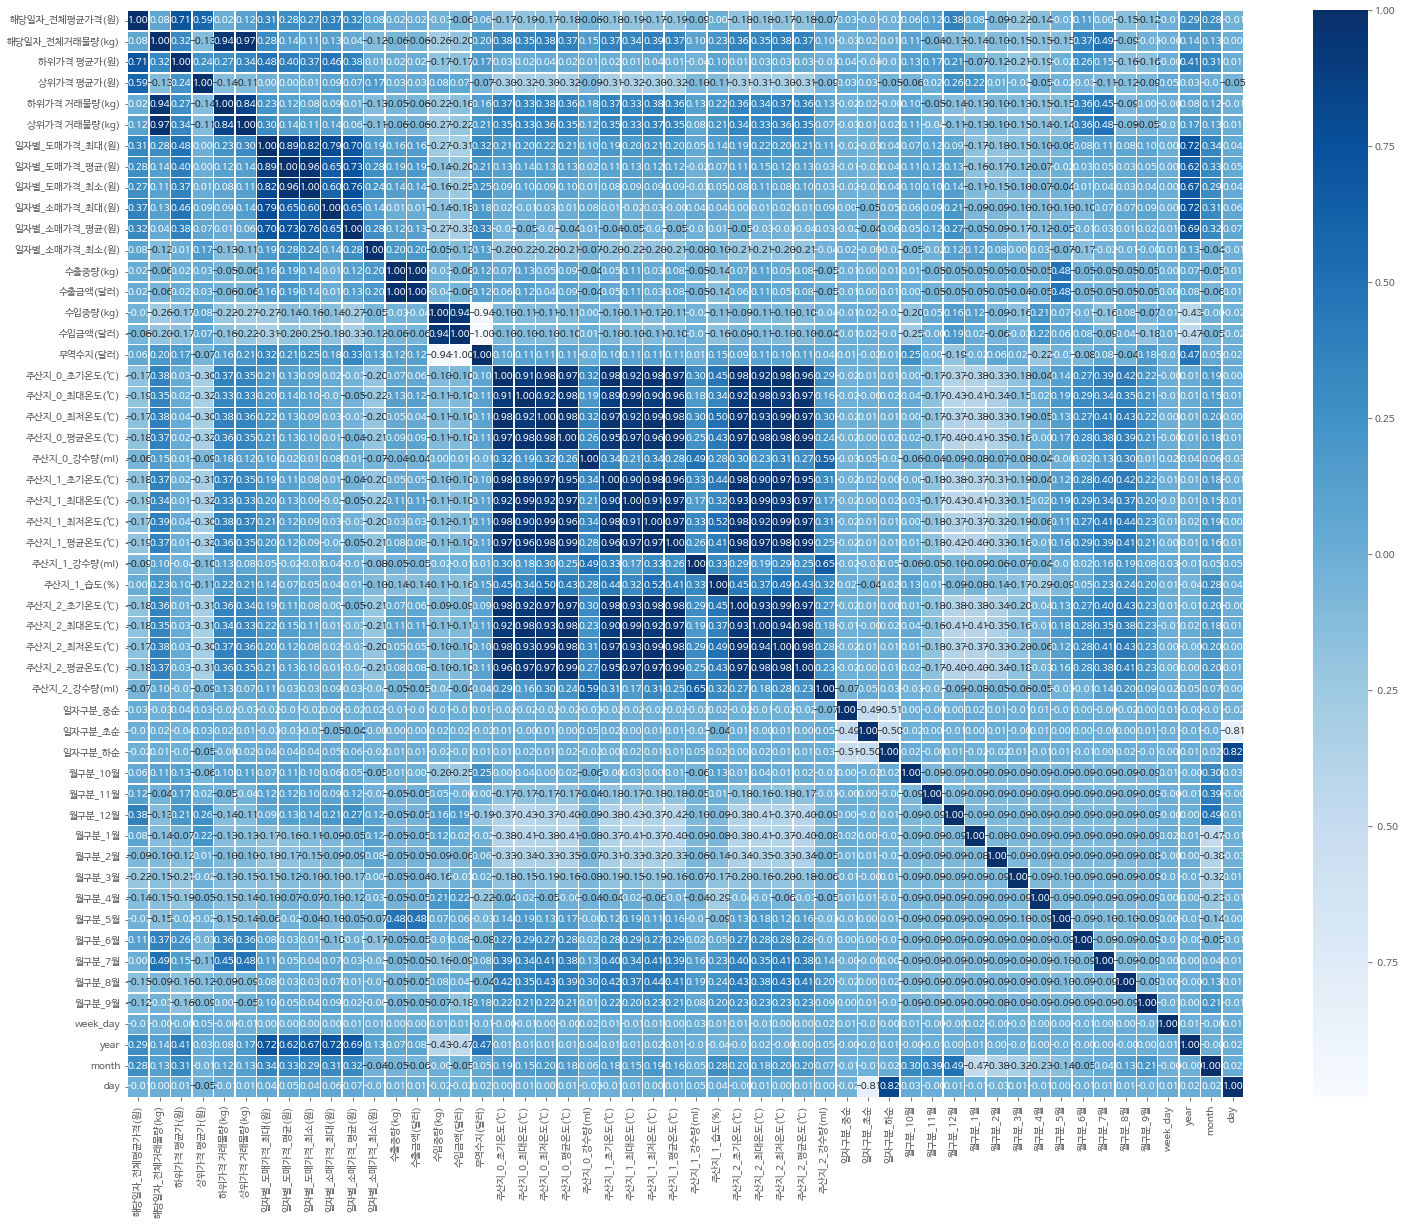

In [ ]:
import seaborn as sns 

plt.figure(figsize=(25,20))
sns.heatmap(data = train.corr(method='pearson'), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

전처리 방법으로 노이즈와 필터링이 있다.

In [ ]:
# 데이터 전처리? 피쳐추가.. 스케일링, 원핫인코딩, 필요없는 칼럼

단가(원)', '거래량', '거래대금(원)', '경매건수

해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)

수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)',
       '무역수지(달러)

# 잡음제거

In [ ]:
#AutoEncoder
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data_utils 

# class TimeDistributed(nn.Module):
#     def __init__(self, module):
#         super(TimeDistributed, self).__init__()
#         self.module = module

#     def forward(self, x):
#         if len(x.size()) <= 2:
#             return self.module(x)
#         x_reshape = x.contiguous().view(-1, x.size(-1)) 
#         y = self.module(x_reshape)
#         if len(x.size()) == 3:
#             y = y.contiguous().view(x.size(0), -1, y.size(-1))
#         return y

# class Autoencoder(nn.Module):
#     def __init__(self):
#         super(Autoencoder, self).__init__()
#         self.encoder = nn.LSTM(
#                                input_size = 1, 
#                                hidden_size = 16, 
#                                dropout = 0.25,
#                                num_layers = 2,
#                                bias = True,
#                                batch_first = True,
#                                bidirectional = True,
#                                )
#         self.decoder = nn.LSTM(
#                                input_size = 32, 
#                                hidden_size = 16, 
#                                dropout = 0.25,
#                                num_layers = 2,
#                                bias = True,
#                                batch_first = True,
#                                bidirectional = True,
#                                )
#         self.fc = TimeDistributed(nn.Linear(32, 1))
                
#     def forward(self, x):
#         h0, (h_n, c_n) = self.encoder(x)
#         h0, (h_n, c_n) = self.decoder(h0[:,-1:,:].repeat(1,5,1))
#         out = self.fc(h0)
#         return out

In [ ]:
# from scipy.fftpack import fft
# def FFT(df, col, topn=2):
#     fft = np.fft.fft(df[col])
#     fft[topn:-topn] = 0
#     ifft = np.fft.ifft(fft)
#     return ifft

# train['FFT(30)'] = FFT(train, 'Close', 30)

In [ ]:
# def WT(df, col, wavelet='db5', thresh=0.63):
#     signal = df[col].values
#     thresh = thresh*np.nanmax(signal)
#     coeff = pywt.wavedec(signal, wavelet, mode="per" )
#     coeff[1:] = (pywt.threshold(i, value=thresh, mode="soft" ) for i in coeff[1:])
#     reconstructed_signal = pywt.waverec(coeff, wavelet, mode="per" )
#     return reconstructed_signal

이거 어케 사용하디...ㅠㅠ

거래, 수입, 수출, 날짜(날씨) 이걸 이용해서 피쳐

### 일자구분과 월 구분이 있기 때문에 month와 day는 삭제 가능

In [ ]:
train=train.drop(columns = ['day','month'])
test=test.drop(columns = ['day','month'])

In [ ]:
train.columns

Index(['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)',
       '일자구분_중순', '일자구분_초순', '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월',
       '월구분_1월', '월구분_2월', '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월',
       '월구분_8월', '월구분_9월', 'datetime', 'week_day', 'year'],
      dtype='object')

In [ ]:
train

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year
datadate,,,,,,,,,,,,,,,,,,,,,
20130102,20712.240909,22.0,4605.775000,40040.000000,12.0,10.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,0,0,2013-01-02,3,2013
20130103,3401.863678,541.0,2003.085396,7526.728102,404.0,137.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,0,0,2013-01-03,4,2013
20130104,6553.903226,279.0,2266.215190,8247.540000,79.0,200.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,0,0,2013-01-04,5,2013
20130105,4299.079157,1233.0,2882.419857,9705.626562,977.0,256.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,0,0,0,2013-01-05,6,2013
20130106,4669.031061,396.0,2192.328522,11533.035238,291.0,105.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,0,0,2013-01-06,0,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161226,7288.848284,408.0,3009.191071,10284.608333,168.0,240.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,0,0,2016-12-26,1,2016
20161228,6128.845893,1595.0,2617.179207,9958.081389,832.0,763.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,0,0,2016-12-28,3,2016
20161229,6644.034096,437.0,3934.725676,9441.552558,222.0,215.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,0,0,2016-12-29,4,2016


In [ ]:
test

,해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),...,월구분_3월,월구분_4월,월구분_5월,월구분_6월,월구분_7월,월구분_8월,월구분_9월,datetime,week_day,year
datadate,,,,,,,,,,,,,,,,,,,,,
20170102,104.0,6246.631731,8306.034783,104.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-02,1,2017
20170104,1028.0,2541.385563,8306.034783,568.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-04,3,2017
20170105,156.0,2622.375000,9250.151515,24.0,132.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-05,4,2017
20170106,847.0,2540.694030,5387.631818,737.0,110.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-06,5,2017
20170107,147.0,5012.857813,10178.843373,64.0,83.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0,2017-01-07,6,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180528,3715.0,3800.534975,6998.233867,1767.0,1948.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,0.0,0.0,1.0,0.0,0.0,0.0,0,2018-05-28,1,2018
20180530,6378.0,3553.912119,7002.635566,2798.0,3580.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,0.0,0.0,1.0,0.0,0.0,0.0,0,2018-05-30,3,2018
20180531,5960.0,3517.269545,7005.388163,2420.0,3540.0,248000.0,239600.0,233000.0,8990.0,5759.750000,...,0.0,0.0,1.0,0.0,0.0,0.0,0,2018-05-31,4,2018


### 요일 원핫인코딩

In [ ]:
train=pd.get_dummies(train,columns=['week_day'])
test=pd.get_dummies(test,columns=['week_day'])
print(train.shape)
print(test.shape)
train.head()

(1224, 57)
(115, 55)


,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,월구분_9월,datetime,year,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
datadate,,,,,,,,,,,,,,,,,,,,,
20130102,20712.240909,22.0,4605.775000,40040.000000,12.0,10.0,180000.0,178800.0,174000.0,5980.0,...,0,2013-01-02,2013,0,0,0,1,0,0,0
20130103,3401.863678,541.0,2003.085396,7526.728102,404.0,137.0,180000.0,178800.0,174000.0,5980.0,...,0,2013-01-03,2013,0,0,0,0,1,0,0
20130104,6553.903226,279.0,2266.215190,8247.540000,79.0,200.0,180000.0,178800.0,174000.0,5980.0,...,0,2013-01-04,2013,0,0,0,0,0,1,0
20130105,4299.079157,1233.0,2882.419857,9705.626562,977.0,256.0,180000.0,178800.0,174000.0,5980.0,...,0,2013-01-05,2013,0,0,0,0,0,0,1
20130106,4669.031061,396.0,2192.328522,11533.035238,291.0,105.0,180000.0,177800.0,174000.0,5980.0,...,0,2013-01-06,2013,1,0,0,0,0,0,0


In [ ]:
test

,해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),...,월구분_8월,월구분_9월,datetime,year,week_day_0,week_day_1,week_day_3,week_day_4,week_day_5,week_day_6
datadate,,,,,,,,,,,,,,,,,,,,,
20170102,104.0,6246.631731,8306.034783,104.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0,2017-01-02,2017,0,1,0,0,0,0
20170104,1028.0,2541.385563,8306.034783,568.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0,2017-01-04,2017,0,0,1,0,0,0
20170105,156.0,2622.375000,9250.151515,24.0,132.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0,2017-01-05,2017,0,0,0,1,0,0
20170106,847.0,2540.694030,5387.631818,737.0,110.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0,2017-01-06,2017,0,0,0,0,1,0
20170107,147.0,5012.857813,10178.843373,64.0,83.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0.0,0,2017-01-07,2017,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180528,3715.0,3800.534975,6998.233867,1767.0,1948.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,0.0,0,2018-05-28,2018,0,1,0,0,0,0
20180530,6378.0,3553.912119,7002.635566,2798.0,3580.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,0.0,0,2018-05-30,2018,0,0,1,0,0,0
20180531,5960.0,3517.269545,7005.388163,2420.0,3540.0,248000.0,239600.0,233000.0,8990.0,5759.750000,...,0.0,0,2018-05-31,2018,0,0,0,1,0,0


현재 test셋에는 week_day_2가 없다. 넣어주자

In [ ]:
test.insert(51,'week_day_2',0)

스케일링과 요일과 년도필요하면 원핫인코딩

Feature Engineering : Year Inflaction : 2017

In [ ]:
test

,해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),...,월구분_9월,datetime,year,week_day_0,week_day_1,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6
datadate,,,,,,,,,,,,,,,,,,,,,
20170102,104.0,6246.631731,8306.034783,104.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0,2017-01-02,2017,0,1,0,0,0,0,0
20170104,1028.0,2541.385563,8306.034783,568.0,460.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0,2017-01-04,2017,0,0,0,1,0,0,0
20170105,156.0,2622.375000,9250.151515,24.0,132.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0,2017-01-05,2017,0,0,0,0,1,0,0
20170106,847.0,2540.694030,5387.631818,737.0,110.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0,2017-01-06,2017,0,0,0,0,0,1,0
20170107,147.0,5012.857813,10178.843373,64.0,83.0,225000.0,216600.0,210000.0,8980.0,5299.285714,...,0,2017-01-07,2017,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180528,3715.0,3800.534975,6998.233867,1767.0,1948.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,0,2018-05-28,2018,0,1,0,0,0,0,0
20180530,6378.0,3553.912119,7002.635566,2798.0,3580.0,248000.0,239400.0,232000.0,8990.0,5789.756098,...,0,2018-05-30,2018,0,0,0,1,0,0,0
20180531,5960.0,3517.269545,7005.388163,2420.0,3540.0,248000.0,239600.0,233000.0,8990.0,5759.750000,...,0,2018-05-31,2018,0,0,0,0,1,0,0


### 피쳐추가: 상하위 평균가 차이

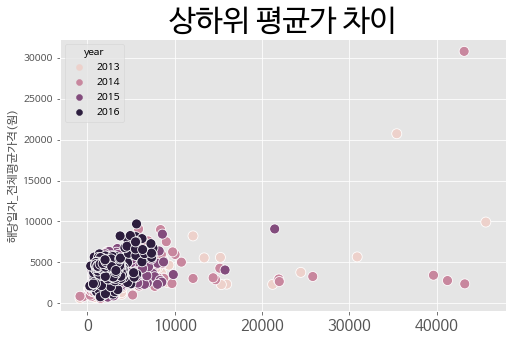

In [ ]:
from seaborn.relational import scatterplot
differ = train['상위가격 평균가(원)'] - train['하위가격 평균가(원)']

plt.figure(figsize=(8,5))
sns.scatterplot(x=differ, y=train['해당일자_전체평균가격(원)'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.title('상하위 평균가 차이', fontsize = 30)
plt.show()

In [ ]:
train['differ'] = train['상위가격 평균가(원)'] - train['하위가격 평균가(원)']
test['differ'] = test['상위가격 평균가(원)'] - test['하위가격 평균가(원)']

### 피쳐추가: 거래물량과 가격의 곱을 합하다.

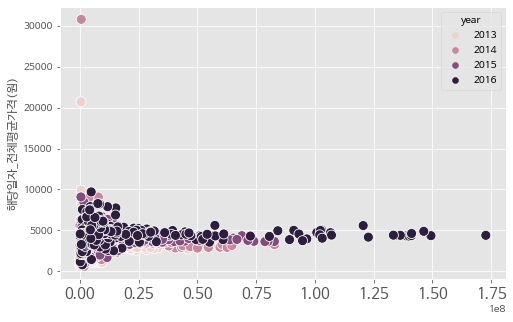

In [ ]:
from seaborn.relational import scatterplot
plus = train['상위가격 평균가(원)']*train['상위가격 거래물량(kg)'] + train['하위가격 평균가(원)']*train['하위가격 거래물량(kg)']

plt.figure(figsize=(8,5))
sns.scatterplot(x=plus, y=train['해당일자_전체평균가격(원)'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.show()

In [ ]:
train['plus'] = train['상위가격 평균가(원)']*train['상위가격 거래물량(kg)'] + train['하위가격 평균가(원)']*train['하위가격 거래물량(kg)']
test['plus'] = test['상위가격 평균가(원)']*test['상위가격 거래물량(kg)'] + test['하위가격 평균가(원)']*test['하위가격 거래물량(kg)']

### 피쳐추가: 거래물량 차이

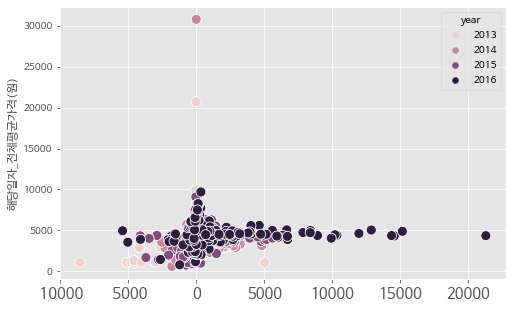

In [ ]:
kg_differ = train['상위가격 거래물량(kg)'] - train['하위가격 거래물량(kg)']

plt.figure(figsize=(8,5))
sns.scatterplot(x=kg_differ, y=train['해당일자_전체평균가격(원)'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.show()

In [ ]:
train['kg_differ'] = train['상위가격 거래물량(kg)'] - train['하위가격 거래물량(kg)']
test['kg_differ'] = test['상위가격 거래물량(kg)'] - test['하위가격 거래물량(kg)']

### 피쳐추가: 거래물량과 가격의 곱 빼주기

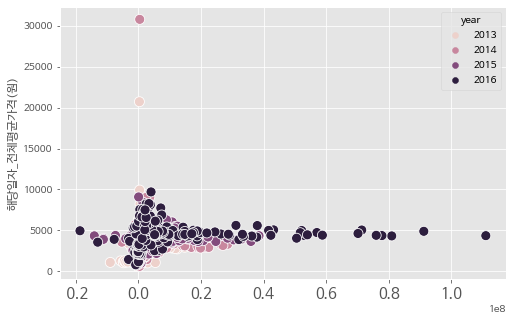

In [ ]:
m = train['상위가격 평균가(원)']*train['상위가격 거래물량(kg)'] - train['하위가격 평균가(원)']*train['하위가격 거래물량(kg)']

plt.figure(figsize=(8,5))
sns.scatterplot(x=m, y=train['해당일자_전체평균가격(원)'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.show()

In [ ]:
train['m'] = train['상위가격 평균가(원)']*train['상위가격 거래물량(kg)'] - train['하위가격 평균가(원)']*train['하위가격 거래물량(kg)']
test['m'] = test['상위가격 평균가(원)']*test['상위가격 거래물량(kg)'] - test['하위가격 평균가(원)']*test['하위가격 거래물량(kg)']

### 피쳐추가: 소매에서 도매 빼주기

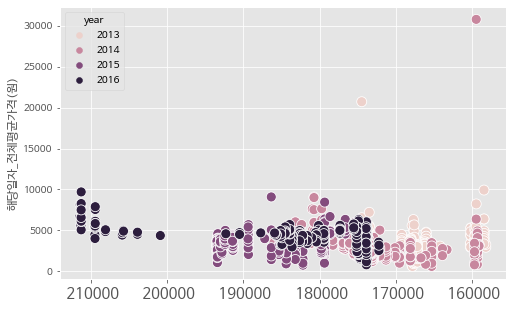

In [ ]:
sale_price = train['일자별_소매가격_평균(원)'] - train['일자별_도매가격_평균(원)']

plt.figure(figsize=(8,5))
sns.scatterplot(x=sale_price, y=train['해당일자_전체평균가격(원)'], hue=train['year'], s = 100 )
plt.xticks(fontsize=15)
plt.show()

In [ ]:
train['sale_price'] = train['일자별_소매가격_평균(원)'] - train['일자별_도매가격_평균(원)']
test['sale_price'] = test['일자별_소매가격_평균(원)'] - test['일자별_도매가격_평균(원)']

- train['상위가격 평균가(원)']/train['상위가격 거래물량(kg)'] + train['하위가격 평균가(원)']/train['하위가격 거래물량(kg)']도 나중에 해보자. -도!

In [ ]:
train.columns

Index(['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)',
       '일자구분_중순', '일자구분_초순', '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월',
       '월구분_1월', '월구분_2월', '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월',
       '월구분_8월', '월구분_9월', 'datetime', 'year', 'week_day_0', 'week_day_1',
       'week_day_2', 'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6',
       'differ', 'plus', 'kg_differ', 'm', 'sale_price'],
      dtype='object')

In [ ]:
train

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,differ,plus,kg_differ,m,sale_price
datadate,,,,,,,,,,,,,,,,,,,,,
20130102,20712.240909,22.0,4605.775000,40040.000000,12.0,10.0,180000.0,178800.0,174000.0,5980.0,...,0,1,0,0,0,35434.225000,455669.300,-2.0,345130.700,-174501.477273
20130103,3401.863678,541.0,2003.085396,7526.728102,404.0,137.0,180000.0,178800.0,174000.0,5980.0,...,0,0,1,0,0,5523.642706,1840408.250,-267.0,221915.250,-174501.477273
20130104,6553.903226,279.0,2266.215190,8247.540000,79.0,200.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,1,0,5981.324810,1828539.000,121.0,1470477.000,-174501.477273
20130105,4299.079157,1233.0,2882.419857,9705.626562,977.0,256.0,180000.0,178800.0,174000.0,5980.0,...,0,0,0,0,1,6823.206706,5300764.600,-721.0,-331483.800,-174501.477273
20130106,4669.031061,396.0,2192.328522,11533.035238,291.0,105.0,180000.0,177800.0,174000.0,5980.0,...,0,0,0,0,0,9340.706716,1848936.300,-186.0,573001.100,-173513.068182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161226,7288.848284,408.0,3009.191071,10284.608333,168.0,240.0,225000.0,216600.0,210000.0,8980.0,...,0,0,0,0,0,7275.417262,2973850.100,72.0,1962761.900,-211272.558140
20161228,6128.845893,1595.0,2617.179207,9958.081389,832.0,763.0,225000.0,216600.0,210000.0,8980.0,...,0,1,0,0,0,7340.902183,9775509.200,-69.0,5420523.000,-211272.558140
20161229,6644.034096,437.0,3934.725676,9441.552558,222.0,215.0,225000.0,216600.0,210000.0,8980.0,...,0,0,1,0,0,5506.826882,2903442.900,-7.0,1156424.700,-211280.454545


In [ ]:
col=['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)','differ','plus','kg_differ','m','sale_price']

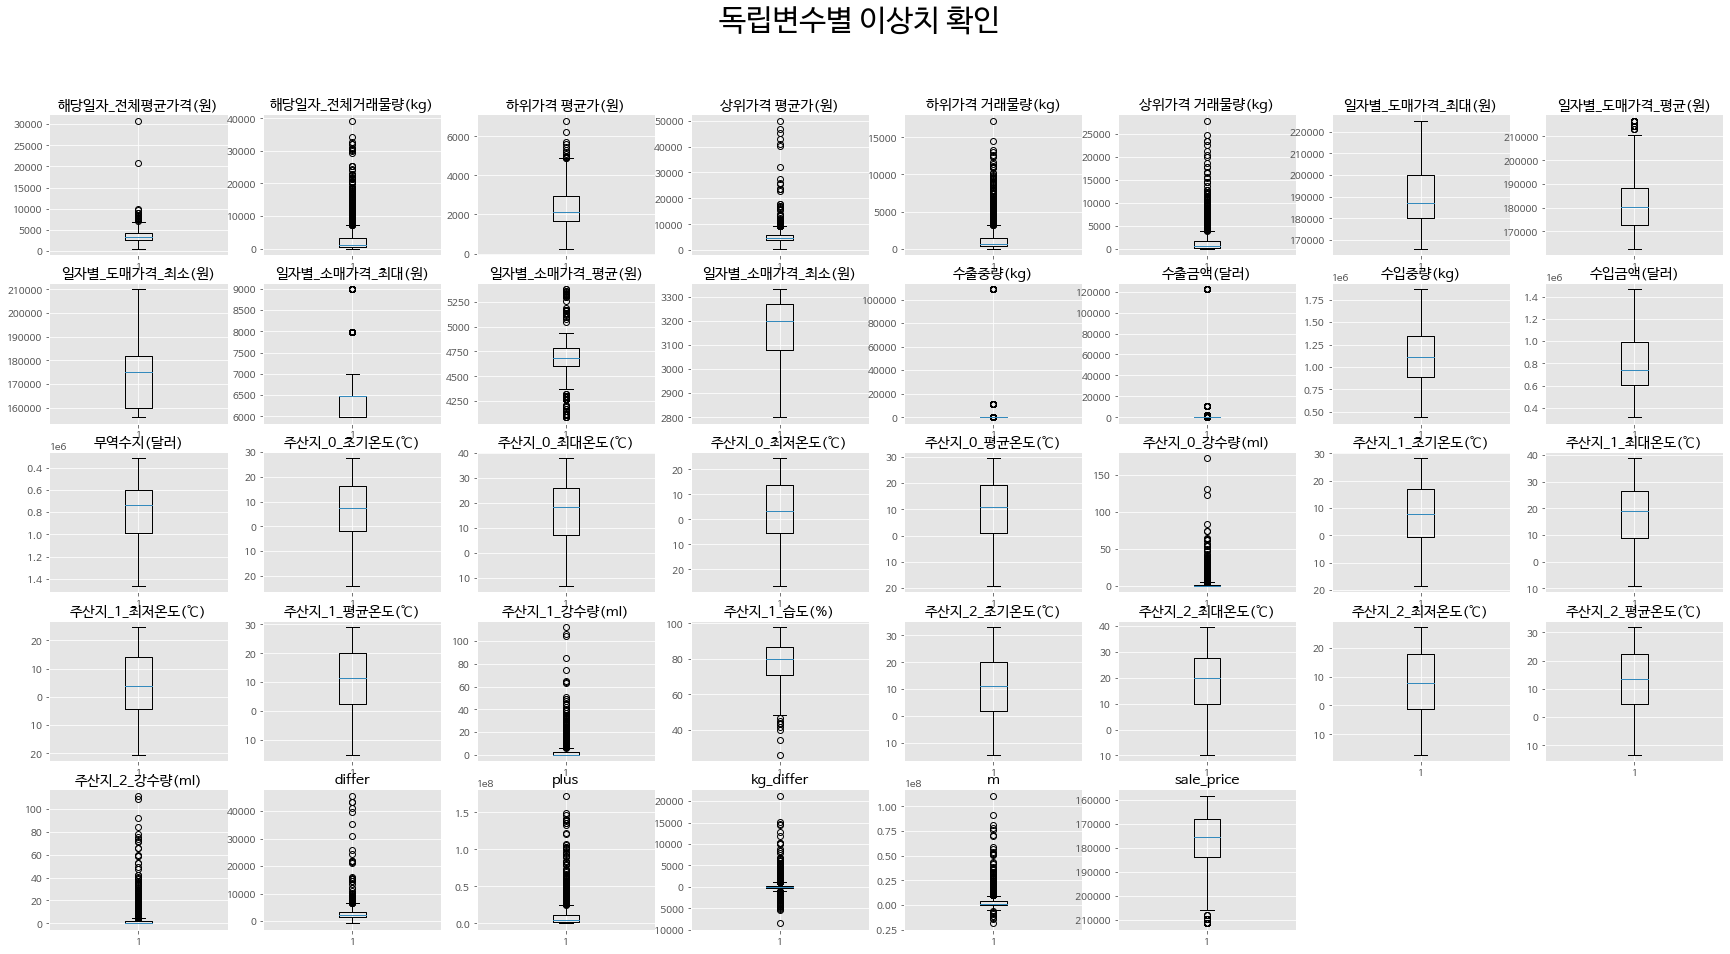

In [ ]:
plt.style.use("ggplot")

feature = col

plt.figure(figsize=(30,15))
plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

for i in range(len(col)):
  plt.subplot(5,8,i+1)
  plt.title(feature[i])
  plt.boxplot(train[feature[i]])
plt.show()


# 데이터 시각화

In [ ]:
import matplotlib.pylab as plt
import seaborn as sns

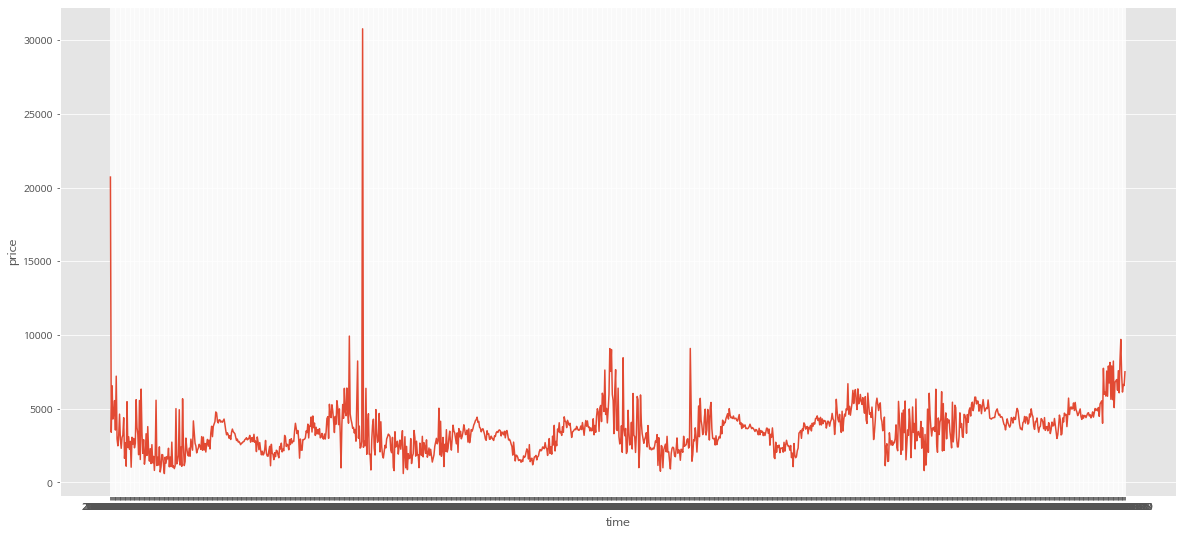

In [ ]:
plt.figure(figsize = (20, 9))
sns.lineplot(x = train['datetime'], y = train['해당일자_전체평균가격(원)'])
plt.xlabel('time')
plt.ylabel('price')
plt.show()

## 이상치 제거

변동률 구하는 것에 영향안주겠지?

In [ ]:
train = train[train['해당일자_전체평균가격(원)'] <= 20000]

In [ ]:
train[60:70]

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,differ,plus,kg_differ,m,sale_price
datadate,,,,,,,,,,,,,,,,,,,,,
20130321,1047.709701,4690.0,1044.409091,1265.550000,4620.0,70.0,175000.0,172000.0,160000.0,5980.0,...,0,0,1,0,0,221.140909,4913758.5,-4550.0,-4736581.5,-167874.888889
20130322,1891.295861,459.0,1719.187500,2108.338916,256.0,203.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,1,0,389.151416,868104.8,-53.0,-12119.2,-167874.888889
20130323,1870.168902,328.0,1569.750000,2072.491837,132.0,196.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,1,502.741837,613415.4,64.0,199001.4,-167874.888889
20130324,1182.565249,4866.0,1129.603812,1764.358374,4460.0,406.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,0,634.754563,5754362.5,-4054.0,-4321703.5,-167878.409091
20130325,600.600000,40.0,1451.032967,600.600000,182.0,40.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,0,-850.432967,288112.0,-142.0,-240064.0,-167852.666667
20130327,1716.145503,378.0,1451.032967,1962.321429,182.0,196.0,175000.0,172000.0,160000.0,5980.0,...,0,1,0,0,0,511.288462,648703.0,14.0,120527.0,-167852.666667
20130328,1304.565278,4994.0,1140.371865,5045.047619,4784.0,210.0,175000.0,172000.0,160000.0,5980.0,...,0,0,1,0,0,3904.675754,6514999.0,-4574.0,-4396079.0,-167852.666667
20130329,1746.994660,412.0,1629.038462,1818.874219,156.0,256.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,1,0,189.835757,719761.8,100.0,211501.8,-167852.666667
20130330,1597.072864,398.0,1506.768421,3503.500000,380.0,18.0,175000.0,172000.0,160000.0,5980.0,...,0,0,0,0,1,1996.731579,635635.0,-362.0,-509509.0,-167830.444444


## 로그

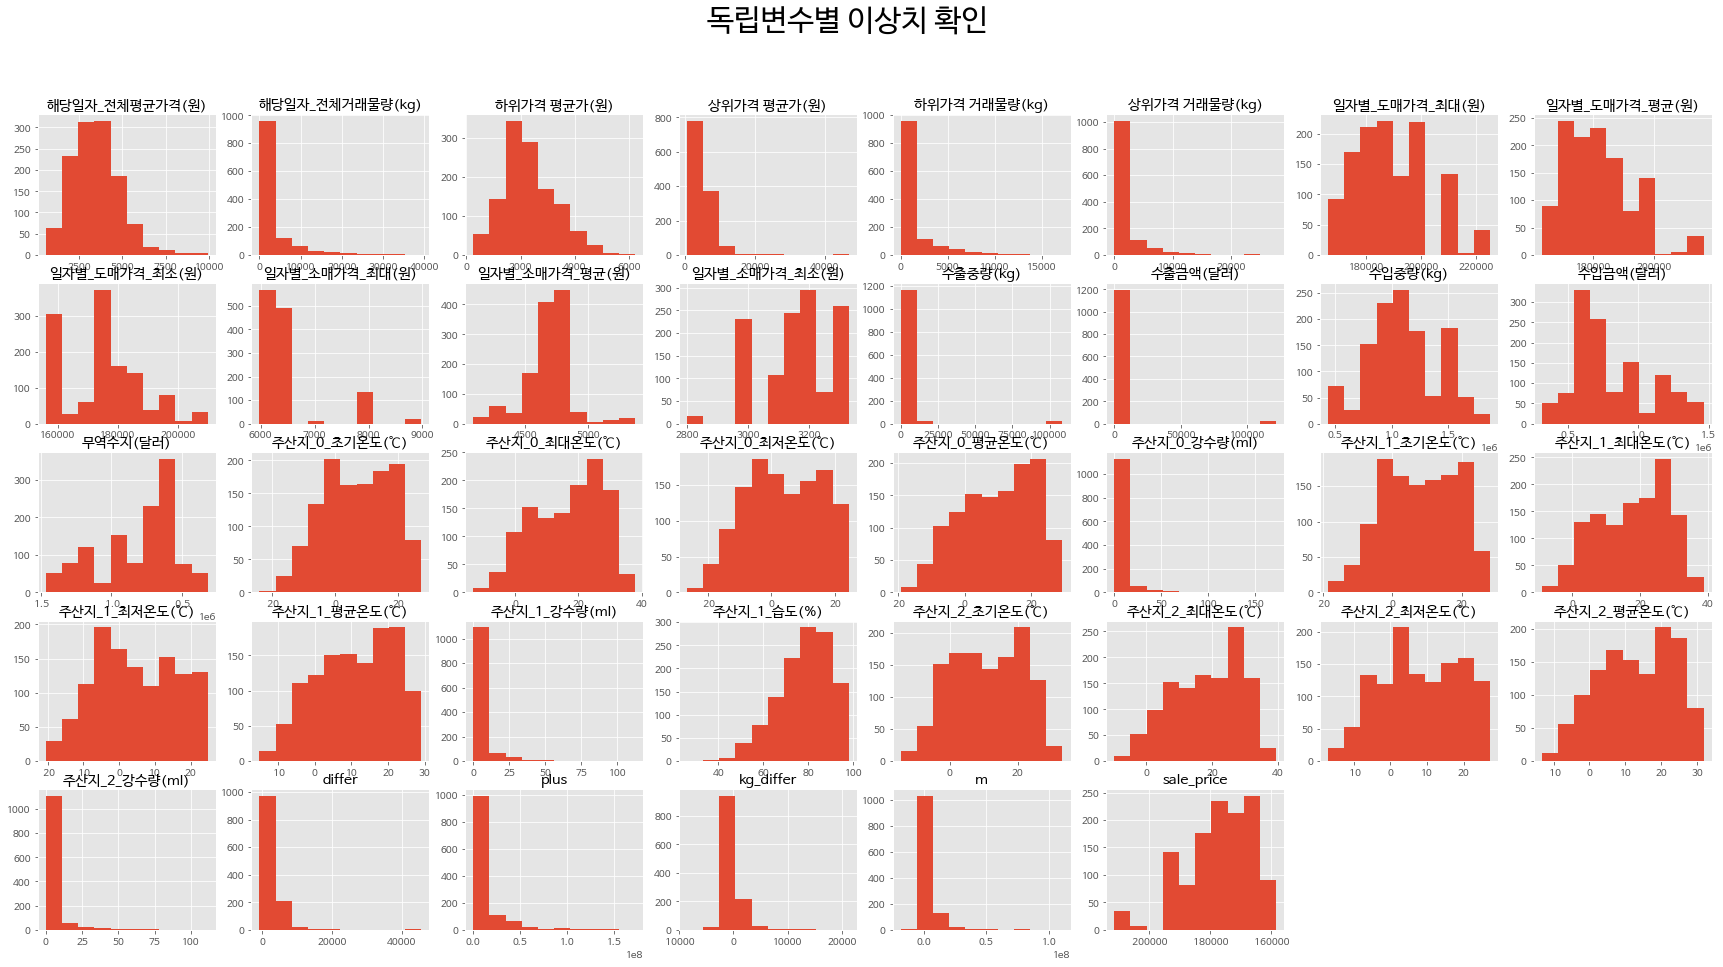

In [ ]:
plt.style.use("ggplot")

feature = col

plt.figure(figsize=(30,15))
plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

for i in range(len(col)):
  plt.subplot(5,8,i+1)
  plt.title(feature[i])
  plt.hist(train[feature[i]])
plt.show()

In [ ]:
col_log = ['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)','주산지_0_강수량(ml)','주산지_1_강수량(ml)','주산지_2_강수량(ml)','differ','plus']

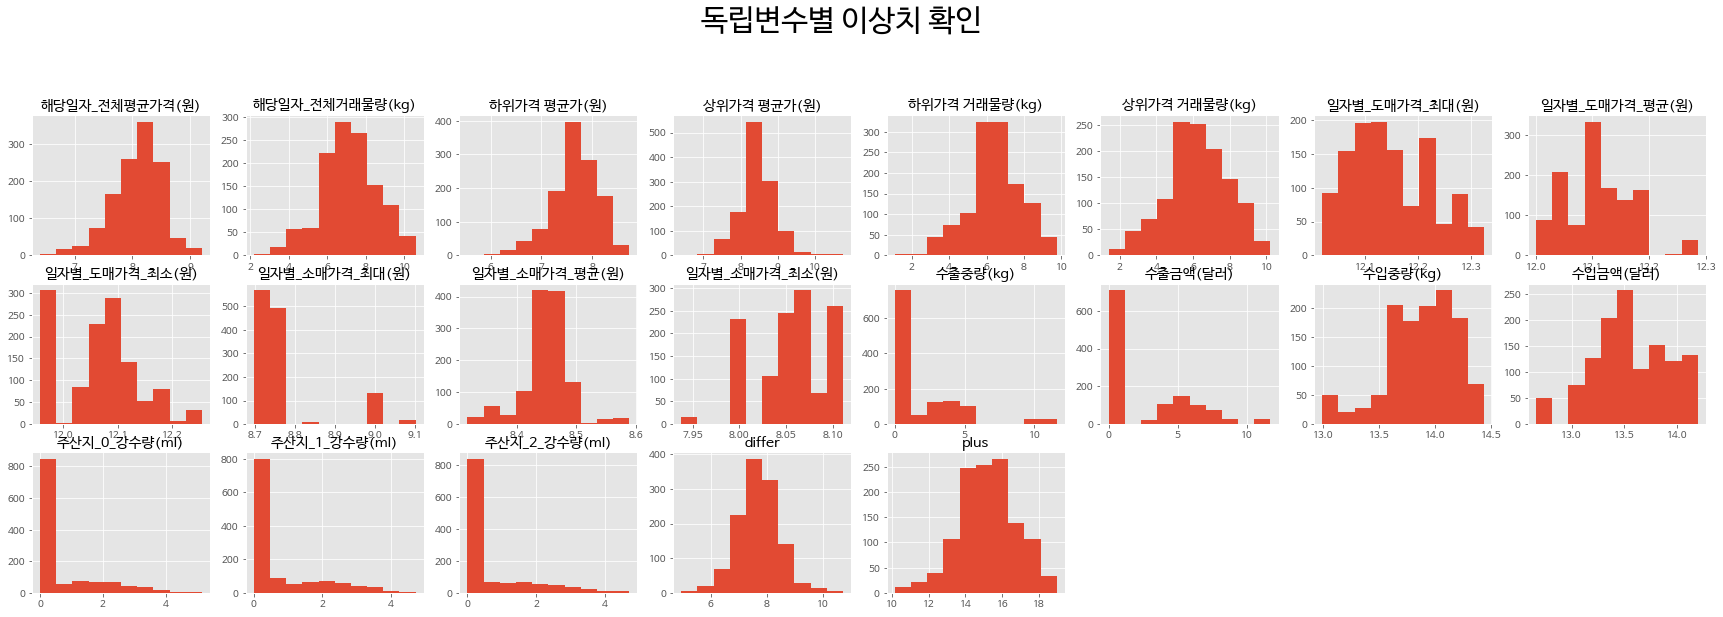

In [ ]:
plt.style.use("ggplot")

feature = col_log

plt.figure(figsize=(30,15))
plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

for i in range(len(col_log)):
  plt.subplot(5,8,i+1)
  plt.title(feature[i])
  plt.hist(np.log1p(train[feature[i]]))
plt.show()

- 해당일자_전체거래물량(kg), 상위가격 평균가(원), 하위가격 거래물량(kg), 상위가격 거래물량(kg) 로그

In [ ]:
train['상위가격 평균가(원)']=np.log1p(train['상위가격 평균가(원)'])
train['하위가격 평균가(원)']=np.log1p(train['하위가격 평균가(원)'])
train['해당일자_전체거래물량(kg)']=np.log1p(train['해당일자_전체거래물량(kg)'])
train['하위가격 거래물량(kg)']=np.log1p(train['하위가격 거래물량(kg)'])
train['상위가격 거래물량(kg)']=np.log1p(train['상위가격 거래물량(kg)'])
train['plus']=np.log1p(train['plus'])

In [ ]:
test['상위가격 평균가(원)']=np.log1p(test['상위가격 평균가(원)'])
test['하위가격 평균가(원)']=np.log1p(test['하위가격 평균가(원)'])
test['해당일자_전체거래물량(kg)']=np.log1p(test['해당일자_전체거래물량(kg)'])
test['하위가격 거래물량(kg)']=np.log1p(test['하위가격 거래물량(kg)'])
test['상위가격 거래물량(kg)']=np.log1p(test['상위가격 거래물량(kg)'])
test['plus']=np.log1p(test['plus'])

## 스케일링

로그로?

In [ ]:
train.columns

Index(['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)',
       '일자구분_중순', '일자구분_초순', '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월',
       '월구분_1월', '월구분_2월', '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월',
       '월구분_8월', '월구분_9월', 'datetime', 'year', 'week_day_0', 'week_day_1',
       'week_day_2', 'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6',
       'differ', 'plus', 'kg_differ', 'm', 'sale_price'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_cols = ['일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)','differ','kg_differ','m','sale_price']
                
scaled = scaler.fit_transform(train[scale_cols])

train[['일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)','differ','kg_differ','m','sale_price']] = scaled

train

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,differ,plus,kg_differ,m,sale_price
datadate,,,,,,,,,,,,,,,,,,,,,
20130103,3401.863678,6.295266,7.602943,8.926349,6.003887,4.927254,0.237288,0.297398,0.333333,0.0,...,0,0,1,0,0,0.137112,14.425499,0.277403,0.145453,0.694183
20130104,6553.903226,5.634790,7.726308,9.017791,4.382027,5.303305,0.237288,0.297398,0.333333,0.0,...,0,0,0,1,0,0.146957,14.419028,0.290413,0.155086,0.694183
20130105,4299.079157,7.118016,7.966732,9.180564,6.885510,5.549076,0.237288,0.297398,0.333333,0.0,...,0,0,0,0,1,0.165067,15.483362,0.262180,0.141184,0.694183
20130106,4669.031061,5.983936,7.693176,9.353058,5.676754,4.663439,0.237288,0.278810,0.333333,0.0,...,0,0,0,0,0,0.219221,14.430122,0.280119,0.148162,0.712763
20130107,5549.780093,5.783825,7.915154,9.039955,5.105945,5.081404,0.237288,0.278810,0.333333,0.0,...,0,0,0,0,0,0.140797,14.402258,0.286222,0.150686,0.712763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161226,7288.848284,6.013715,8.009759,9.238501,5.129899,5.484797,1.000000,1.000000,1.000000,1.0,...,0,0,0,0,0,0.174794,14.905368,0.288770,0.158884,0.002955
20161228,6128.845893,7.375256,7.870234,9.206240,6.725034,6.638568,1.000000,1.000000,1.000000,1.0,...,0,1,0,0,0,0.176203,16.095391,0.284043,0.185560,0.002955
20161229,6644.034096,6.082219,8.277851,9.152982,5.407172,5.375278,1.000000,1.000000,1.000000,1.0,...,0,0,1,0,0,0.136750,14.881408,0.286121,0.152663,0.002807


In [ ]:
scaler = MinMaxScaler()
                
scaled = scaler.fit_transform(test[scale_cols])

test[['일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)','differ','kg_differ','m','sale_price']] = scaled

test

,해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),...,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,differ,plus,kg_differ,m,sale_price
datadate,,,,,,,,,,,,,,,,,,,,,
20170102,4.653960,8.739958,9.024858,4.653960,6.133398,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,0,0,0,0.055430,15.312994,0.105465,0.036793,0.625451
20170104,6.936343,7.840858,9.024858,6.343880,6.133398,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,1,0,0,0,0.165332,15.476456,0.086737,0.031031,0.625451
20170105,5.056246,7.872217,9.132503,3.218876,4.890349,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,1,0,0,0.190933,14.065458,0.095455,0.022182,0.625451
20170106,6.742881,7.840586,8.592047,6.603944,4.709530,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,0,1,0,0.078789,14.717756,0.065789,0.004486,0.625451
20170107,4.997212,8.519961,9.228165,4.174387,4.430817,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,0,0,1,0.147575,13.968805,0.091863,0.017579,0.625451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180528,8.220403,8.243160,8.853556,7.477604,7.575072,0.891892,0.994444,0.971429,0.02439,0.946184,...,0,0,0,0,0,0.089193,16.828498,0.098402,0.063981,0.006382
20180530,8.760767,8.176086,8.854185,7.937017,8.183397,0.891892,0.994444,0.971429,0.02439,0.946184,...,0,1,0,0,0,0.096639,17.371238,0.122659,0.123561,0.006382
20180531,8.692994,8.165725,8.854578,7.791936,8.172164,0.891892,1.000000,1.000000,0.02439,0.898964,...,0,0,1,0,0,0.097808,17.321394,0.136301,0.131993,0.000000


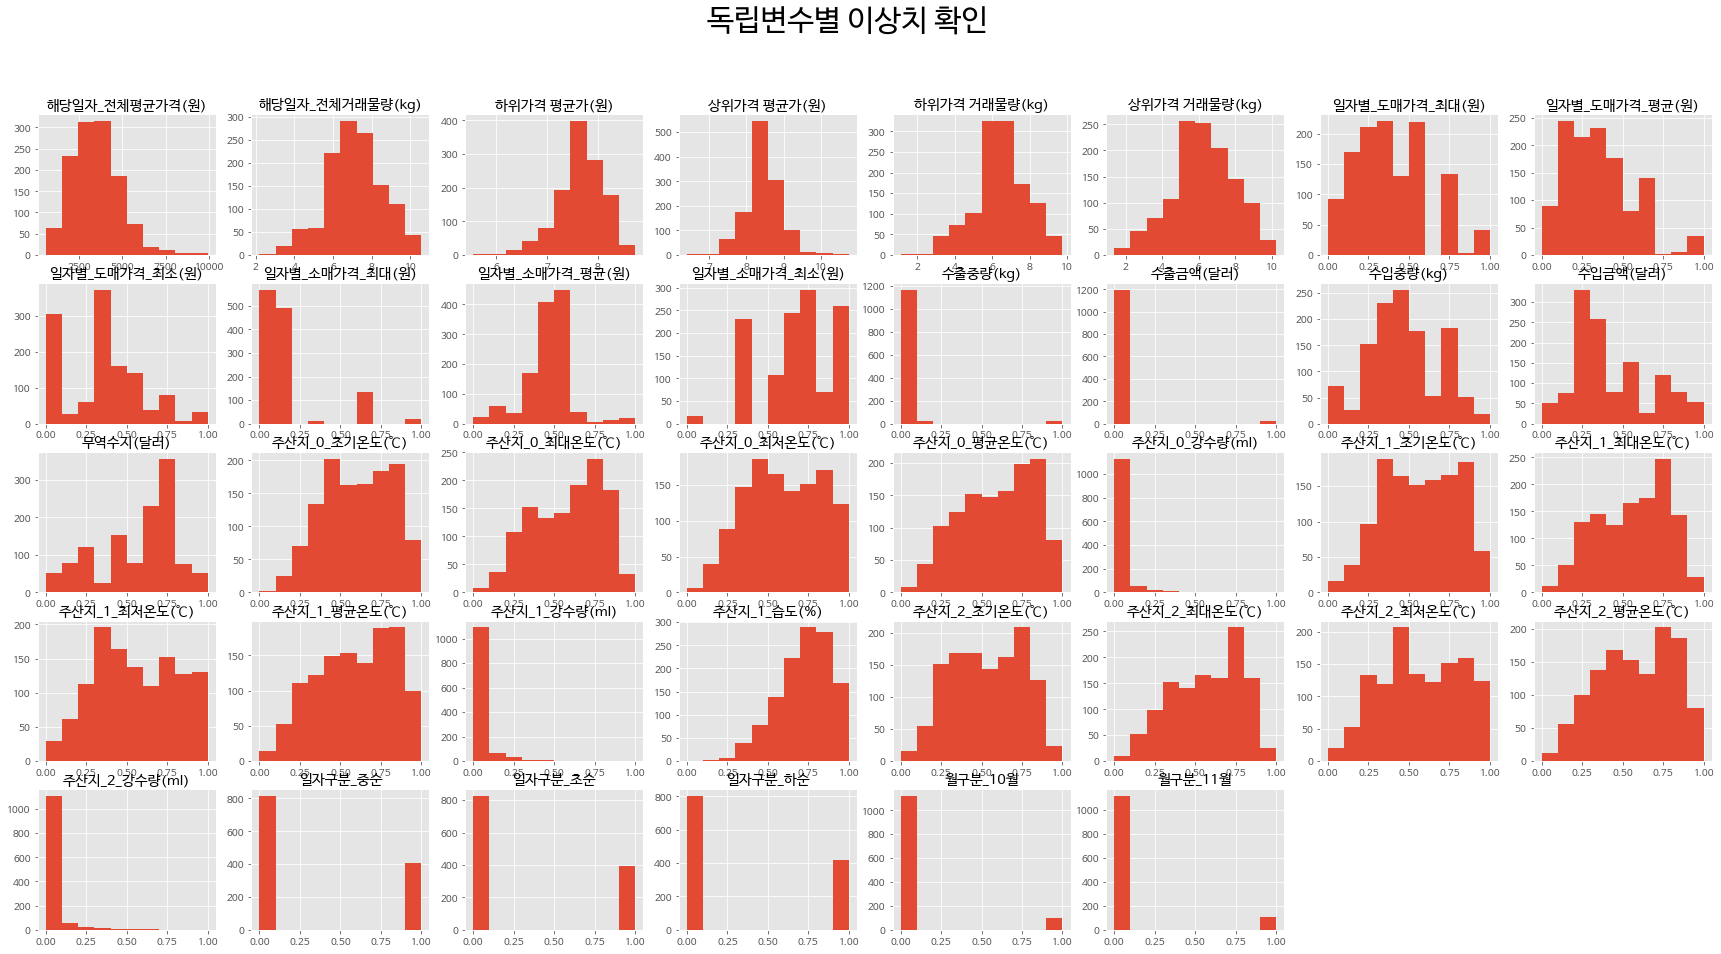

In [ ]:
plt.style.use("ggplot")

feature = train.describe().columns

plt.figure(figsize=(30,15))
plt.suptitle("독립변수별 이상치 확인", fontsize = 30)

for i in range(len(col)):
  plt.subplot(5,8,i+1)
  plt.title(feature[i])
  plt.hist(train[feature[i]])
plt.show()

모델로 하면 좋은거: ARIMA, Neural network, catboost, xgb,lgbm

lstm은 시장데이터에서는 안좋은 듯

다중도 가능: mlp+xgb, lgbm+cnn+mlp, lgbm+tabnet+ffnn, lgbm+tabnet

모델앙상블에는 blending이 자주 쓰인다.

### 변동률은 (대상시점의 값 - 기준시점의 값) / (기준시점의 값)

In [ ]:
train.columns

Index(['해당일자_전체평균가격(원)', '해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)',
       '일자구분_중순', '일자구분_초순', '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월',
       '월구분_1월', '월구분_2월', '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월',
       '월구분_8월', '월구분_9월', 'datetime', 'year', 'week_day_0', 'week_day_1',
       'week_day_2', 'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6',
       'differ', 'plus', 'kg_differ', 'm', 'sale_price'],
      dtype='object')

In [ ]:
feature_cols = ['해당일자_전체거래물량(kg)', '하위가격 평균가(원)', '상위가격 평균가(원)',
       '하위가격 거래물량(kg)', '상위가격 거래물량(kg)', '일자별_도매가격_최대(원)', '일자별_도매가격_평균(원)',
       '일자별_도매가격_최소(원)', '일자별_소매가격_최대(원)', '일자별_소매가격_평균(원)', '일자별_소매가격_최소(원)',
       '수출중량(kg)', '수출금액(달러)', '수입중량(kg)', '수입금액(달러)', '무역수지(달러)',
       '주산지_0_초기온도(℃)', '주산지_0_최대온도(℃)', '주산지_0_최저온도(℃)', '주산지_0_평균온도(℃)',
       '주산지_0_강수량(ml)', '주산지_1_초기온도(℃)', '주산지_1_최대온도(℃)', '주산지_1_최저온도(℃)',
       '주산지_1_평균온도(℃)', '주산지_1_강수량(ml)', '주산지_1_습도(%)', '주산지_2_초기온도(℃)',
       '주산지_2_최대온도(℃)', '주산지_2_최저온도(℃)', '주산지_2_평균온도(℃)', '주산지_2_강수량(ml)',
       '일자구분_중순', '일자구분_초순', '일자구분_하순', '월구분_10월', '월구분_11월', '월구분_12월',
       '월구분_1월', '월구분_2월', '월구분_3월', '월구분_4월', '월구분_5월', '월구분_6월', '월구분_7월',
       '월구분_8월', '월구분_9월', 'year', 'week_day_0', 'week_day_1',
       'week_day_2', 'week_day_3', 'week_day_4', 'week_day_5', 'week_day_6','differ','plus','kg_differ','m','sale_price']

In [ ]:
# 분석할 의미가 없는 칼럼을 제거합니다.
train = train.drop(columns=['datetime'])
test = test.drop(columns=['datetime'])

In [ ]:
from sklearn.model_selection import train_test_split


# 학습에 사용할 정보와 예측하고자 하는 정보를 분리합니다.
X= train.drop(columns=['해당일자_전체평균가격(원)'])
y= train['해당일자_전체평균가격(원)']

X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.2,shuffle=True)

In [ ]:
def make_dataset(data, label, window_size=4):
    feature_list = []
    label_list = []
    for i in range(len(data) - window_size):
        feature_list.append(np.array(data.iloc[i:i+window_size]))
        label_list.append(np.array(label.iloc[i+window_size]))
    return np.array(feature_list), np.array(label_list)

In [ ]:
train

,해당일자_전체평균가격(원),해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),...,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,differ,plus,kg_differ,m,sale_price
datadate,,,,,,,,,,,,,,,,,,,,,
20130103,3401.863678,6.295266,7.602943,8.926349,6.003887,4.927254,0.237288,0.297398,0.333333,0.0,...,0,0,1,0,0,0.137112,14.425499,0.277403,0.145453,0.694183
20130104,6553.903226,5.634790,7.726308,9.017791,4.382027,5.303305,0.237288,0.297398,0.333333,0.0,...,0,0,0,1,0,0.146957,14.419028,0.290413,0.155086,0.694183
20130105,4299.079157,7.118016,7.966732,9.180564,6.885510,5.549076,0.237288,0.297398,0.333333,0.0,...,0,0,0,0,1,0.165067,15.483362,0.262180,0.141184,0.694183
20130106,4669.031061,5.983936,7.693176,9.353058,5.676754,4.663439,0.237288,0.278810,0.333333,0.0,...,0,0,0,0,0,0.219221,14.430122,0.280119,0.148162,0.712763
20130107,5549.780093,5.783825,7.915154,9.039955,5.105945,5.081404,0.237288,0.278810,0.333333,0.0,...,0,0,0,0,0,0.140797,14.402258,0.286222,0.150686,0.712763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20161226,7288.848284,6.013715,8.009759,9.238501,5.129899,5.484797,1.000000,1.000000,1.000000,1.0,...,0,0,0,0,0,0.174794,14.905368,0.288770,0.158884,0.002955
20161228,6128.845893,7.375256,7.870234,9.206240,6.725034,6.638568,1.000000,1.000000,1.000000,1.0,...,0,1,0,0,0,0.176203,16.095391,0.284043,0.185560,0.002955
20161229,6644.034096,6.082219,8.277851,9.152982,5.407172,5.375278,1.000000,1.000000,1.000000,1.0,...,0,0,1,0,0,0.136750,14.881408,0.286121,0.152663,0.002807


In [ ]:
test

,해당일자_전체거래물량(kg),하위가격 평균가(원),상위가격 평균가(원),하위가격 거래물량(kg),상위가격 거래물량(kg),일자별_도매가격_최대(원),일자별_도매가격_평균(원),일자별_도매가격_최소(원),일자별_소매가격_최대(원),일자별_소매가격_평균(원),...,week_day_2,week_day_3,week_day_4,week_day_5,week_day_6,differ,plus,kg_differ,m,sale_price
datadate,,,,,,,,,,,,,,,,,,,,,
20170102,4.653960,8.739958,9.024858,4.653960,6.133398,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,0,0,0,0.055430,15.312994,0.105465,0.036793,0.625451
20170104,6.936343,7.840858,9.024858,6.343880,6.133398,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,1,0,0,0,0.165332,15.476456,0.086737,0.031031,0.625451
20170105,5.056246,7.872217,9.132503,3.218876,4.890349,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,1,0,0,0.190933,14.065458,0.095455,0.022182,0.625451
20170106,6.742881,7.840586,8.592047,6.603944,4.709530,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,0,1,0,0.078789,14.717756,0.065789,0.004486,0.625451
20170107,4.997212,8.519961,9.228165,4.174387,4.430817,0.270270,0.361111,0.342857,0.00000,0.174341,...,0,0,0,0,1,0.147575,13.968805,0.091863,0.017579,0.625451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20180528,8.220403,8.243160,8.853556,7.477604,7.575072,0.891892,0.994444,0.971429,0.02439,0.946184,...,0,0,0,0,0,0.089193,16.828498,0.098402,0.063981,0.006382
20180530,8.760767,8.176086,8.854185,7.937017,8.183397,0.891892,0.994444,0.971429,0.02439,0.946184,...,0,1,0,0,0,0.096639,17.371238,0.122659,0.123561,0.006382
20180531,8.692994,8.165725,8.854578,7.791936,8.172164,0.891892,1.000000,1.000000,0.02439,0.898964,...,0,0,1,0,0,0.097808,17.321394,0.136301,0.131993,0.000000


## Feature Importance

In [ ]:
np.isnan(train).sum().sum()

#np.where(np.isnan(X)) 

0

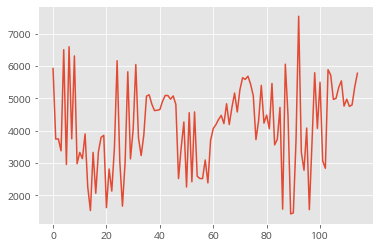

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(X,y)

predict = model.predict(test[feature_cols])

plt.plot(predict)
plt.show()

In [ ]:
feature_cols

['해당일자_전체거래물량(kg)',
 '하위가격 평균가(원)',
 '상위가격 평균가(원)',
 '하위가격 거래물량(kg)',
 '상위가격 거래물량(kg)',
 '일자별_도매가격_최대(원)',
 '일자별_도매가격_평균(원)',
 '일자별_도매가격_최소(원)',
 '일자별_소매가격_최대(원)',
 '일자별_소매가격_평균(원)',
 '일자별_소매가격_최소(원)',
 '수출중량(kg)',
 '수출금액(달러)',
 '수입중량(kg)',
 '수입금액(달러)',
 '무역수지(달러)',
 '주산지_0_초기온도(℃)',
 '주산지_0_최대온도(℃)',
 '주산지_0_최저온도(℃)',
 '주산지_0_평균온도(℃)',
 '주산지_0_강수량(ml)',
 '주산지_1_초기온도(℃)',
 '주산지_1_최대온도(℃)',
 '주산지_1_최저온도(℃)',
 '주산지_1_평균온도(℃)',
 '주산지_1_강수량(ml)',
 '주산지_1_습도(%)',
 '주산지_2_초기온도(℃)',
 '주산지_2_최대온도(℃)',
 '주산지_2_최저온도(℃)',
 '주산지_2_평균온도(℃)',
 '주산지_2_강수량(ml)',
 '일자구분_중순',
 '일자구분_초순',
 '일자구분_하순',
 '월구분_10월',
 '월구분_11월',
 '월구분_12월',
 '월구분_1월',
 '월구분_2월',
 '월구분_3월',
 '월구분_4월',
 '월구분_5월',
 '월구분_6월',
 '월구분_7월',
 '월구분_8월',
 '월구분_9월',
 'year',
 'week_day_0',
 'week_day_1',
 'week_day_2',
 'week_day_3',
 'week_day_4',
 'week_day_5',
 'week_day_6',
 'differ',
 'plus',
 'kg_differ',
 'm',
 'sale_price']

In [ ]:
model.feature_importances_

array([2.62052777e-03, 3.24236002e-01, 4.86105832e-01, 9.73081406e-03,
       3.35485532e-03, 4.18487077e-04, 8.16909143e-04, 7.24116861e-04,
       3.04596725e-04, 1.08439698e-02, 8.61316220e-04, 2.17648867e-04,
       3.26727000e-04, 8.29816562e-04, 8.18574234e-04, 7.17762515e-04,
       7.39731402e-04, 8.35594980e-04, 7.32409728e-04, 6.16467396e-04,
       2.96476481e-04, 1.43943366e-03, 7.12750122e-04, 8.93217536e-04,
       5.07682705e-04, 7.42891074e-04, 1.87846431e-03, 7.57477258e-04,
       6.91163159e-04, 7.70626313e-04, 5.33735778e-04, 5.76942888e-04,
       2.40745856e-04, 3.47677029e-04, 2.54365404e-04, 1.80996429e-05,
       1.12548244e-04, 2.42256532e-02, 2.58035103e-04, 1.46419345e-04,
       2.21171741e-04, 4.59556744e-05, 6.09390591e-05, 1.48537859e-05,
       1.40609796e-04, 2.99228095e-05, 1.09576011e-05, 5.44279717e-04,
       2.39299806e-04, 2.31589695e-04, 8.11139208e-08, 1.73647455e-04,
       2.13591142e-04, 3.16543497e-04, 2.60837549e-04, 1.25856976e-02,
      

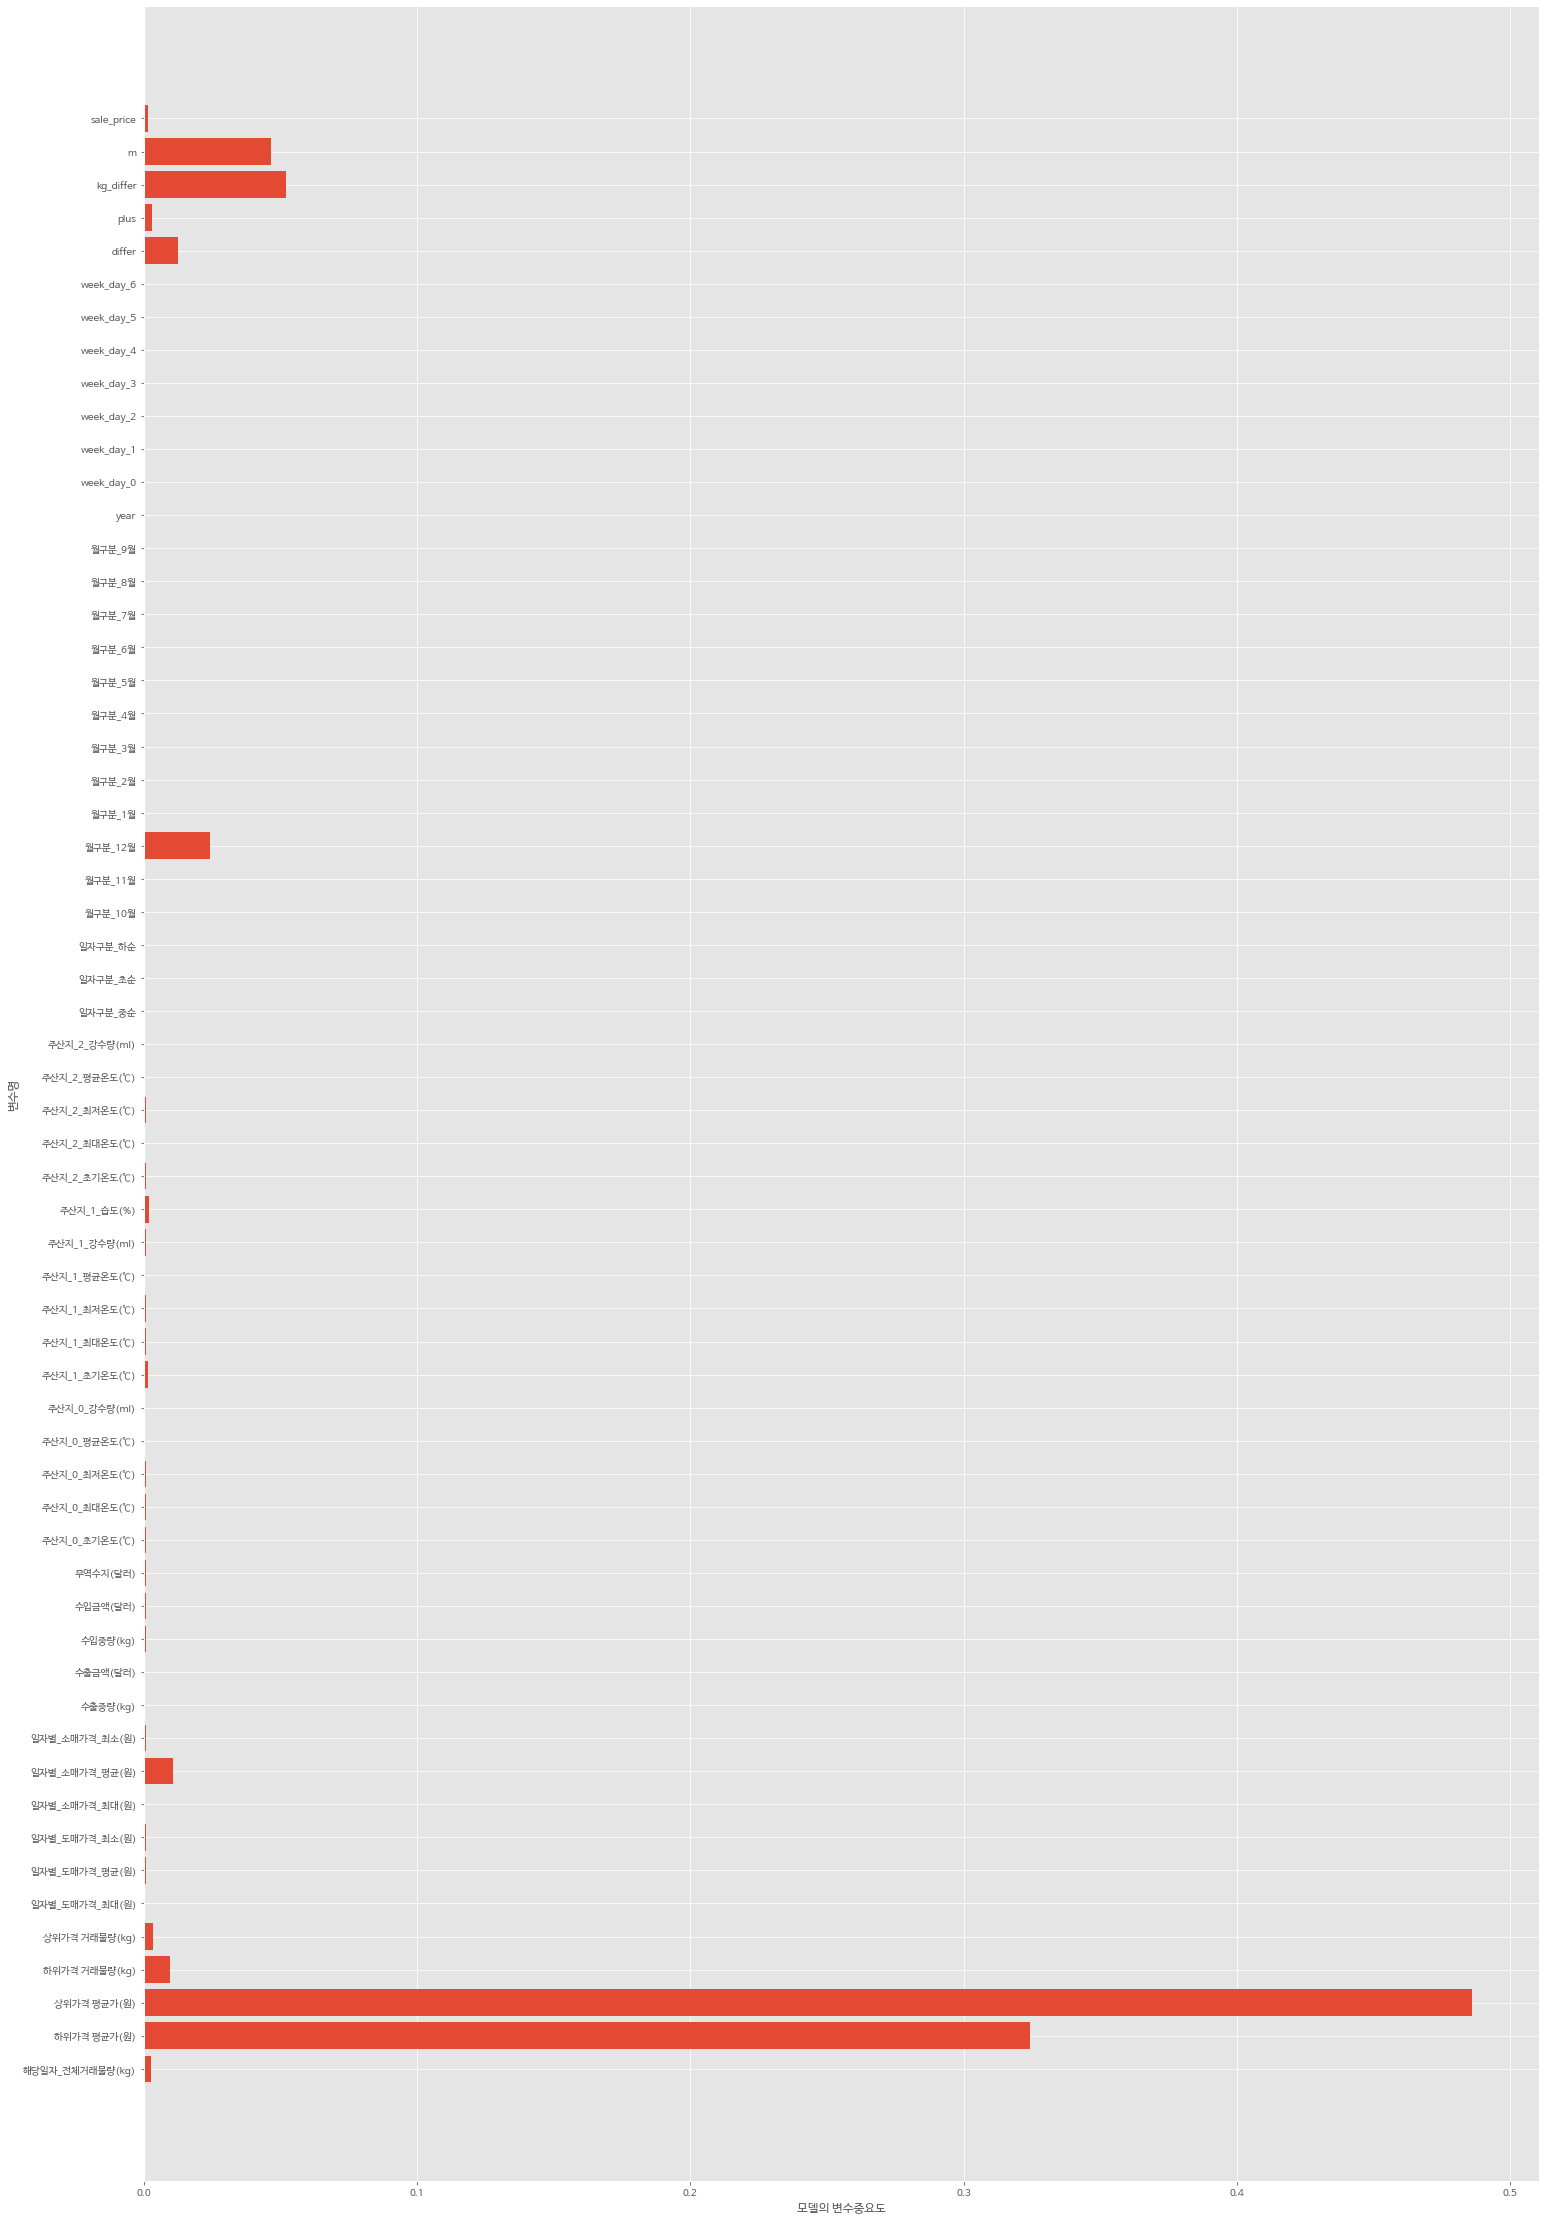

In [ ]:
x = train[feature_cols].columns
y = model.feature_importances_

plt.figure(figsize=(25,40))

plt.xlabel('모델의 변수중요도')
plt.ylabel('변수명')

plt.barh(x,y)
plt.show()